In [12]:
import pandas as pd

import emission.core.get_database as edb
import emission.core.wrapper.entry as ecwe
import emission.storage.decorations.analysis_timeseries_queries as esda
import emission.storage.decorations.trip_queries as esdt
import emission.storage.decorations.timeline as esdl
import emission.storage.timeseries.abstract_timeseries as esta
import emission.storage.timeseries.timequery as estt
import scaffolding
from uuid import UUID

%matplotlib inline

URL not formatted, defaulting to "Stage_database"
Connecting to database URL db


In [13]:
year = None
month = None
program = "default"
study_type = "program"
mode_of_interest = "e-bike"
include_test_users = True

## Load the programs

In [14]:
# Split UUIDs by program
program_uuid_map = {}
for ue in edb.get_uuid_db().find():
    program = ue['user_email'].split("_")[0]
    if program in program_uuid_map.keys():
        program_uuid_map[program].append(str(ue['uuid']))
    else:
        print(f"Found new program {program}, creating new list")
        program_uuid_map[program] = []
        program_uuid_map[program].append(str(ue['uuid']))

Found new program stage, creating new list
Found new program 4c, creating new list
Found new program cc, creating new list
Found new program fc, creating new list
Found new program pc, creating new list
Found new program sc, creating new list
Found new program vail, creating new list
Found new program prepilot, creating new list


In [15]:
uuid_program_list = []
for ue in edb.get_uuid_db().find():
    program = ue['user_email'].split("_")[0]
    uuid_program_list.append({"program": program, "opcode": ue["user_email"], "user_id_str": str(ue['uuid'])})

In [16]:
uuid_program_df = pd.DataFrame.from_dict(uuid_program_list)
uuid_program_df.head()

program             opcode                           user_id_str
0   stage  stage_-o7_9mpIOG0  2bc8ca71-7d0f-4930-ba2c-cf97f7dceaea
1   stage  stage_HiPajVSJhsc  b0c98c51-4bb9-4c67-9ec3-7814cfbdfc82
2   stage  stage_9fVPYzQDo6Q  d4376620-fbcd-4aab-95bf-8c2e0ecf9adf
3   stage  stage_qaFAEe8DY7k  802667b6-371f-45b2-9c7a-bb051244836a
4   stage  stage_rDuumFma4Ao  1fdbfb17-5168-445a-8c2b-14efd528ccdd

In [17]:
from collections import defaultdict

In [18]:
# Loading mapping dictionaries from mapping_dictionaries notebook
%store -r dic_re
%store -r dic_pur

# convert a dictionary to a defaultdict
dic_re = defaultdict(lambda: 'Other',dic_re)
dic_pur = defaultdict(lambda: 'Other',dic_pur)

## Load the trip table

In [19]:
expanded_ct, file_suffix, quality_text, debug_df = scaffolding.load_viz_notebook_data(year,
                                                                            month,
                                                                            program,
                                                                            study_type,
                                                                            dic_re,
                                                                            dic_pur=dic_pur,
                                                                            include_test_users=include_test_users)

0      stage_-o7_9mpIOG0
1      stage_HiPajVSJhsc
2      stage_9fVPYzQDo6Q
3      stage_qaFAEe8DY7k
4      stage_rDuumFma4Ao
             ...        
279    prepilot_rhBZukxY
280    prepilot_k36cxmfA
281    prepilot_FmxVf8u6
282    prepilot_pNpK4pFg
283    prepilot_F3jxHLSW
Name: user_email, Length: 284, dtype: object

0      stage_-o7_9mpIOG0
1      stage_HiPajVSJhsc
2      stage_9fVPYzQDo6Q
3      stage_qaFAEe8DY7k
4      stage_rDuumFma4Ao
             ...        
279    prepilot_rhBZukxY
280    prepilot_k36cxmfA
281    prepilot_FmxVf8u6
282    prepilot_pNpK4pFg
283    prepilot_F3jxHLSW
Name: user_email, Length: 284, dtype: object

Loaded all confirmed trips of length 241123


source        end_ts  \
0  DwellSegmentationDistFilter  1.629238e+09   
1  DwellSegmentationTimeFilter  1.628682e+09   
2  DwellSegmentationTimeFilter  1.628684e+09   
3  DwellSegmentationTimeFilter  1.628686e+09   
4  DwellSegmentationTimeFilter  1.628688e+09   

                       end_fmt_time  \
0  2021-08-17T18:02:26.493017-04:00   
1  2021-08-11T13:39:44.936000+02:00   
2  2021-08-11T14:06:11.774000+02:00   
3  2021-08-11T14:49:37.923000+02:00   
4  2021-08-11T15:11:54.772000+02:00   

                                             end_loc  \
0  {'type': 'Point', 'coordinates': [-71.08788681...   
1  {'type': 'Point', 'coordinates': [33.7674264, ...   
2  {'type': 'Point', 'coordinates': [33.7595711, ...   
3  {'type': 'Point', 'coordinates': [33.7673488, ...   
4  {'type': 'Point', 'coordinates': [33.7643828, ...   

                   raw_trip      start_ts                    start_fmt_time  \
0  611c350df3bfdd5663c34e52  1.629237e+09  2021-08-17T17:51:32.998732-04:00   
1  6113bf6009f3390d387bb211  1.628682e+09         2021-08-11T13:33:51+02:00   
2  6113cd7024f71bcfb27d7c5d  1.628682e+09  2021-08-11T13:42:44.936000+02:00   
3  6113cd7024f71bcfb27d7c5f  1.628684e+09  2021-08-11T14:09:11.774000+02:00   
4  6114ca95c783b3519ce45faa  1.628687e+09  2021-08-11T15:05:28.344737+02:00   

                                           start_loc     duration  \
0  {'type': 'Point', 'coordinates': [-71.11831245...   653.494285   
1  {'type': 'Point', 'coordinates': [33.7754756, ...   353.936000   
2  {'type': 'Point', 'coordinates': [33.7674264, ...  1406.838000   
3  {'type': 'Point', 'coordinates': [33.7595711, ...  2426.149000   
4  {'type': 'Point', 'coordinates': [33.7673488, ...   386.427263   

      distance  ... end_local_dt_day end_local_dt_hour end_local_dt_minute  \
0  2700.231495  ...               17                18                   2   
1  1368.259843  ...               11                13                  39   
2   944.948370  ...               11                14                   6   
3   935.565727  ...               11                14                  49   
4  1398.167487  ...               11                15                  11   

  end_local_dt_second end_local_dt_weekday end_local_dt_timezone  \
0                  26                    1      America/New_York   
1                  44                    2       Africa/Blantyre   
2                  11                    2       Africa/Blantyre   
3                  37                    2       Africa/Blantyre   
4                  54                    2       Africa/Blantyre   

                        _id                               user_id  \
0  611fdd6f1c25a2c3dbf7c5be  8a0473ca-e53d-4720-a99c-0696cc1fb407   
1  611fdd6fbc8ce4a9e39116cb  0a093cbd-b536-43af-b03d-293425e84c76   
2  611fdd6fbc8ce4a9e39116cc  0a093cbd-b536-43af-b03d-293425e84c76   
3  611fdd6fbc8ce4a9e39116cd  0a093cbd-b536-43af-b03d-293425e84c76   
4  611fdd6fbc8ce4a9e39116ce  0a093cbd-b536-43af-b03d-293425e84c76   

  metadata_write_ts additions  
0      1.629478e+09       NaN  
1      1.629478e+09       NaN  
2      1.629478e+09       NaN  
3      1.629478e+09       NaN  
4      1.629478e+09       NaN  

[5 rows x 41 columns]

After filtering, found 241123 participant trips 


source        end_ts  \
0  DwellSegmentationDistFilter  1.629238e+09   
1  DwellSegmentationTimeFilter  1.628682e+09   
2  DwellSegmentationTimeFilter  1.628684e+09   
3  DwellSegmentationTimeFilter  1.628686e+09   
4  DwellSegmentationTimeFilter  1.628688e+09   

                       end_fmt_time  \
0  2021-08-17T18:02:26.493017-04:00   
1  2021-08-11T13:39:44.936000+02:00   
2  2021-08-11T14:06:11.774000+02:00   
3  2021-08-11T14:49:37.923000+02:00   
4  2021-08-11T15:11:54.772000+02:00   

                                             end_loc  \
0  {'type': 'Point', 'coordinates': [-71.08788681...   
1  {'type': 'Point', 'coordinates': [33.7674264, ...   
2  {'type': 'Point', 'coordinates': [33.7595711, ...   
3  {'type': 'Point', 'coordinates': [33.7673488, ...   
4  {'type': 'Point', 'coordinates': [33.7643828, ...   

                   raw_trip      start_ts                    start_fmt_time  \
0  611c350df3bfdd5663c34e52  1.629237e+09  2021-08-17T17:51:32.998732-04:00   
1  6113bf6009f3390d387bb211  1.628682e+09         2021-08-11T13:33:51+02:00   
2  6113cd7024f71bcfb27d7c5d  1.628682e+09  2021-08-11T13:42:44.936000+02:00   
3  6113cd7024f71bcfb27d7c5f  1.628684e+09  2021-08-11T14:09:11.774000+02:00   
4  6114ca95c783b3519ce45faa  1.628687e+09  2021-08-11T15:05:28.344737+02:00   

                                           start_loc     duration  \
0  {'type': 'Point', 'coordinates': [-71.11831245...   653.494285   
1  {'type': 'Point', 'coordinates': [33.7754756, ...   353.936000   
2  {'type': 'Point', 'coordinates': [33.7674264, ...  1406.838000   
3  {'type': 'Point', 'coordinates': [33.7595711, ...  2426.149000   
4  {'type': 'Point', 'coordinates': [33.7673488, ...   386.427263   

      distance  ... end_local_dt_day end_local_dt_hour end_local_dt_minute  \
0  2700.231495  ...               17                18                   2   
1  1368.259843  ...               11                13                  39   
2   944.948370  ...               11                14                   6   
3   935.565727  ...               11                14                  49   
4  1398.167487  ...               11                15                  11   

  end_local_dt_second end_local_dt_weekday end_local_dt_timezone  \
0                  26                    1      America/New_York   
1                  44                    2       Africa/Blantyre   
2                  11                    2       Africa/Blantyre   
3                  37                    2       Africa/Blantyre   
4                  54                    2       Africa/Blantyre   

                        _id                               user_id  \
0  611fdd6f1c25a2c3dbf7c5be  8a0473ca-e53d-4720-a99c-0696cc1fb407   
1  611fdd6fbc8ce4a9e39116cb  0a093cbd-b536-43af-b03d-293425e84c76   
2  611fdd6fbc8ce4a9e39116cc  0a093cbd-b536-43af-b03d-293425e84c76   
3  611fdd6fbc8ce4a9e39116cd  0a093cbd-b536-43af-b03d-293425e84c76   
4  611fdd6fbc8ce4a9e39116ce  0a093cbd-b536-43af-b03d-293425e84c76   

  metadata_write_ts additions  
0      1.629478e+09       NaN  
1      1.629478e+09       NaN  
2      1.629478e+09       NaN  
3      1.629478e+09       NaN  
4      1.629478e+09       NaN  

[5 rows x 41 columns]

After filtering, found 92446 labeled trips


source        end_ts  \
0   DwellSegmentationDistFilter  1.629238e+09   
21  DwellSegmentationTimeFilter  1.624584e+09   
22  DwellSegmentationTimeFilter  1.624585e+09   
23  DwellSegmentationTimeFilter  1.624668e+09   
24  DwellSegmentationTimeFilter  1.624669e+09   

                        end_fmt_time  \
0   2021-08-17T18:02:26.493017-04:00   
21  2021-06-24T18:12:55.542000-07:00   
22  2021-06-24T18:30:45.850000-07:00   
23  2021-06-25T17:41:57.814000-07:00   
24  2021-06-25T18:03:26.767000-07:00   

                                              end_loc  \
0   {'type': 'Point', 'coordinates': [-71.08788681...   
21  {'type': 'Point', 'coordinates': [-122.0494605...   
22  {'type': 'Point', 'coordinates': [-122.0863951...   
23  {'type': 'Point', 'coordinates': [-122.0864556...   
24  {'type': 'Point', 'coordinates': [-122.0863922...   

                    raw_trip      start_ts                    start_fmt_time  \
0   611c350df3bfdd5663c34e52  1.629237e+09  2021-08-17T17:51:32.998732-04:00   
21  60d53c377aa6bb03f0483bbd  1.624583e+09  2021-06-24T18:01:09.304000-07:00   
22  60d54a4033b9b1b2b4559e6f  1.624584e+09  2021-06-24T18:17:57.116694-07:00   
23  60d67fa705fef4a457871508  1.624667e+09  2021-06-25T17:17:20.272773-07:00   
24  60d67fa705fef4a45787150a  1.624668e+09  2021-06-25T17:47:25.841804-07:00   

                                            start_loc     duration  \
0   {'type': 'Point', 'coordinates': [-71.11831245...   653.494285   
21  {'type': 'Point', 'coordinates': [-122.0852855...   706.238000   
22  {'type': 'Point', 'coordinates': [-122.0494605...   768.733306   
23  {'type': 'Point', 'coordinates': [-122.0863951...  1477.541227   
24  {'type': 'Point', 'coordinates': [-122.0864556...   960.925196   

       distance  ... end_local_dt_day end_local_dt_hour end_local_dt_minute  \
0   2700.231495  ...               17                18                   2   
21  3800.968075  ...               24                18                  12   
22  4552.378072  ...               24                18                  30   
23  1741.182935  ...               25                17                  41   
24  1146.789821  ...               25                18                   3   

   end_local_dt_second end_local_dt_weekday end_local_dt_timezone  \
0                   26                    1      America/New_York   
21                  55                    3   America/Los_Angeles   
22                  45                    3   America/Los_Angeles   
23                  57                    4   America/Los_Angeles   
24                  26                    4   America/Los_Angeles   

                         _id                               user_id  \
0   611fdd6f1c25a2c3dbf7c5be  8a0473ca-e53d-4720-a99c-0696cc1fb407   
21  611fdd71688f92fbb6e6a82e  a3587c47-863c-4ff1-9618-80b9369aafda   
22  611fdd71688f92fbb6e6a82f  a3587c47-863c-4ff1-9618-80b9369aafda   
23  611fdd71688f92fbb6e6a830  a3587c47-863c-4ff1-9618-80b9369aafda   
24  611fdd71688f92fbb6e6a831  a3587c47-863c-4ff1-9618-80b9369aafda   

   metadata_write_ts additions  
0       1.629478e+09       NaN  
21      1.629478e+09       NaN  
22      1.629478e+09       NaN  
23      1.629478e+09       NaN  
24      1.629478e+09       NaN  

[5 rows x 41 columns]

mode_confirm   purpose_confirm replaced_mode
0          walk          exercise     no_travel
21  shared_ride  pick_drop_person           bus
22  shared_ride              home           bus
23         walk          exercise     no_travel
24         walk          exercise     no_travel

Found Index(['mode_confirm', 'purpose_confirm', 'replaced_mode'], dtype='object') columns of length 3
After expanding, columns went from 41 -> 44


source        end_ts  \
0   DwellSegmentationDistFilter  1.629238e+09   
21  DwellSegmentationTimeFilter  1.624584e+09   
22  DwellSegmentationTimeFilter  1.624585e+09   
23  DwellSegmentationTimeFilter  1.624668e+09   
24  DwellSegmentationTimeFilter  1.624669e+09   

                        end_fmt_time  \
0   2021-08-17T18:02:26.493017-04:00   
21  2021-06-24T18:12:55.542000-07:00   
22  2021-06-24T18:30:45.850000-07:00   
23  2021-06-25T17:41:57.814000-07:00   
24  2021-06-25T18:03:26.767000-07:00   

                                              end_loc  \
0   {'type': 'Point', 'coordinates': [-71.08788681...   
21  {'type': 'Point', 'coordinates': [-122.0494605...   
22  {'type': 'Point', 'coordinates': [-122.0863951...   
23  {'type': 'Point', 'coordinates': [-122.0864556...   
24  {'type': 'Point', 'coordinates': [-122.0863922...   

                    raw_trip      start_ts                    start_fmt_time  \
0   611c350df3bfdd5663c34e52  1.629237e+09  2021-08-17T17:51:32.998732-04:00   
21  60d53c377aa6bb03f0483bbd  1.624583e+09  2021-06-24T18:01:09.304000-07:00   
22  60d54a4033b9b1b2b4559e6f  1.624584e+09  2021-06-24T18:17:57.116694-07:00   
23  60d67fa705fef4a457871508  1.624667e+09  2021-06-25T17:17:20.272773-07:00   
24  60d67fa705fef4a45787150a  1.624668e+09  2021-06-25T17:47:25.841804-07:00   

                                            start_loc     duration  \
0   {'type': 'Point', 'coordinates': [-71.11831245...   653.494285   
21  {'type': 'Point', 'coordinates': [-122.0852855...   706.238000   
22  {'type': 'Point', 'coordinates': [-122.0494605...   768.733306   
23  {'type': 'Point', 'coordinates': [-122.0863951...  1477.541227   
24  {'type': 'Point', 'coordinates': [-122.0864556...   960.925196   

       distance  ... end_local_dt_second end_local_dt_weekday  \
0   2700.231495  ...                  26                    1   
21  3800.968075  ...                  55                    3   
22  4552.378072  ...                  45                    3   
23  1741.182935  ...                  57                    4   
24  1146.789821  ...                  26                    4   

   end_local_dt_timezone                       _id  \
0       America/New_York  611fdd6f1c25a2c3dbf7c5be   
21   America/Los_Angeles  611fdd71688f92fbb6e6a82e   
22   America/Los_Angeles  611fdd71688f92fbb6e6a82f   
23   America/Los_Angeles  611fdd71688f92fbb6e6a830   
24   America/Los_Angeles  611fdd71688f92fbb6e6a831   

                                 user_id metadata_write_ts  additions  \
0   8a0473ca-e53d-4720-a99c-0696cc1fb407      1.629478e+09        NaN   
21  a3587c47-863c-4ff1-9618-80b9369aafda      1.629478e+09        NaN   
22  a3587c47-863c-4ff1-9618-80b9369aafda      1.629478e+09        NaN   
23  a3587c47-863c-4ff1-9618-80b9369aafda      1.629478e+09        NaN   
24  a3587c47-863c-4ff1-9618-80b9369aafda      1.629478e+09        NaN   

   mode_confirm   purpose_confirm replaced_mode  
0          walk          exercise     no_travel  
21  shared_ride  pick_drop_person           bus  
22  shared_ride              home           bus  
23         walk          exercise     no_travel  
24         walk          exercise     no_travel  

[5 rows x 44 columns]

_prepilot
Based on 92395 confirmed trips from 235 testers and participants
of 241123 total  trips from 261 users (38.32%)


0      stage_-o7_9mpIOG0
1      stage_HiPajVSJhsc
2      stage_9fVPYzQDo6Q
3      stage_qaFAEe8DY7k
4      stage_rDuumFma4Ao
             ...        
279    prepilot_rhBZukxY
280    prepilot_k36cxmfA
281    prepilot_FmxVf8u6
282    prepilot_pNpK4pFg
283    prepilot_F3jxHLSW
Name: user_email, Length: 284, dtype: object

0      stage_-o7_9mpIOG0
1      stage_HiPajVSJhsc
2      stage_9fVPYzQDo6Q
3      stage_qaFAEe8DY7k
4      stage_rDuumFma4Ao
             ...        
279    prepilot_rhBZukxY
280    prepilot_k36cxmfA
281    prepilot_FmxVf8u6
282    prepilot_pNpK4pFg
283    prepilot_F3jxHLSW
Name: user_email, Length: 284, dtype: object

In [9]:
expanded_ct["user_id_str"] = expanded_ct.user_id.apply(lambda u: str(u))
len(expanded_ct.user_id_str.unique())

235

## Combine program and trip tables

In [13]:
# %conda install shapely

Channels:
 - defaults
 - conda-forge
Platform: linux-64
Solving environment: done


==> WARNING: A newer version of conda exists. <==
    current version: 23.9.0
    latest version: 23.11.0

Please update conda by running

    $ conda update -n base -c conda-forge conda



## Package Plan ##

  environment location: /root/miniconda-23.5.2/envs/emission

  added / updated specs:
    - shapely


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2023.12.12 |       h06a4308_0         126 KB
    certifi-2023.11.17         |   py39h06a4308_0         158 KB
    geos-3.8.0                 |       he6710b0_0         961 KB
    shapely-2.0.1              |   py39h0fbb895_0         433 KB
    ------------------------------------------------------------
                                           Total:         1.6 MB

The following NEW packages will be INSTALLED:

  geos               

In [20]:
import pandas as pd
from uuid import UUID
import json
from shapely.geometry import MultiPoint

%matplotlib inline

In [24]:
trip_program_df = expanded_ct.merge(uuid_program_df, on="user_id_str")

In [366]:
trip_program_df = pd.read_csv("filtered_merged_trips.csv")

/tmp/ipykernel_185/2196111928.py:1: DtypeWarning: Columns (66,73,76) have mixed types. Specify dtype option on import or set low_memory=False.
  trip_program_df = pd.read_csv("filtered_merged_trips.csv")


In [367]:
trip_program_df["distance_km"] = trip_program_df.distance / 1000

In [368]:
trip_program_df.dtypes

Unnamed: 0          int64
source             object
end_ts              int64
end_fmt_time       object
end_loc            object
                   ...   
PINC_NUM          float64
VEH_num             int64
DRIVERS             int64
DRIVERS_num        object
veh_per_driver    float64
Length: 88, dtype: object

In [369]:
trip_program_df.sample(n=50, random_state=123)[["program", "user_id_str", "opcode", "_id", "start_fmt_time", "end_fmt_time", "distance_km", "mode_confirm"]]

program                           user_id_str                   opcode  \
22868      cc  8b087643-0c26-41bc-aea9-54ea00520e64      cc_qCcOmC5ustjogyqg   
43776      pc  d3dff742-d079-42ca-805c-2f72e49e12c5      pc_Xkr0blTlwVfVzFzO   
14747      cc  c2c5d4b9-a607-487e-a405-a99c721079d4      cc_qhKzYOlQIDLfCxqu   
10277      cc  c7ce889c-796f-4e2a-8859-fa2d7d5068fe      cc_gro6SkBCtkj2FOrF   
37816      fc  7347df5e-0ac9-4a10-9790-b31ba2e8a02a  fc_csu_TMUSjqGBWELwW5mZ   
40659      pc  0b3e78fa-91d8-4aa6-a320-3440143c8c16      pc_ff3Wiw3Z-Yg2cFqV   
54751      sc  367eb90b-929d-4f6e-9470-d15c700d2e3f      sc_F7Fz1MzRcJhP6118   
52882      sc  fbff5e08-b7f2-4a94-ab4b-2d7371999ef7      sc_9k_f-K8DStf1Rqkg   
11763      cc  c7ce889c-796f-4e2a-8859-fa2d7d5068fe      cc_gro6SkBCtkj2FOrF   
14038      cc  ece8b0a5-0953-4e98-a0d3-69f25de4a206      cc_caYaGRxzKDIbwAE-   
44103      pc  a35a1570-7e2a-4301-ac86-9ec3b5802f35      pc_MSOWkh0m8Qdd1fSp   
6745       cc  2f3b66a5-f985-46d4-b769-1fba57fa640f      cc_gb5LNVpqBxG_TTEj   
2034       4c  863e9c6c-8ec0-48c4-b765-3f73d839c85b      4c_Ze5Y_li7r4MOsbqj   
45070      pc  d3735ba2-12dd-4c76-8e16-75dca7bdcb6f      pc_lqAOZ5A0ltwUdFyq   
16104      cc  7381a74b-a4f3-4f40-b332-ebace7ee9527      cc_y-AXrIpMoqQhYVn7   
42249      pc  88041edd-ad75-42ea-8c92-b30e5c64e198      pc_TFHFmkf7jkni_mNX   
32903      fc  d51de709-f950-45f8-bacf-473574b96ba5  fc_csu_p3Fo9KtInPA8YY3s   
26483      cc  ac604b44-fdca-482f-b753-034cb55d1351      cc_wGj5RV6LZLAQKtVq   
29810      fc  2114e2a7-5304-475f-ad06-ad201948fbad  fc_csu_Q3OvBlHTnm12y-rC   
10829      cc  c7ce889c-796f-4e2a-8859-fa2d7d5068fe      cc_gro6SkBCtkj2FOrF   
14275      cc  ece8b0a5-0953-4e98-a0d3-69f25de4a206      cc_caYaGRxzKDIbwAE-   
41535      pc  28cb1dde-8551-4bba-bfd4-2145bdaf7e0a      pc_e8jy5rXCnoDv23gu   
34269      fc  487ad897-ba93-404a-8cbe-5de7d1922691  fc_csu_Tm3oQ7KqlhllQt8M   
24739      cc  737ef849-4f26-407b-8b2a-6b1b1dc631a4      cc_cI2cgavkNDVkjVn7   
38133      pc  fc68a5bb-0a7b-4b63-86b3-f08a69ead36f      pc_T78ZDTS3715Du0cg   
10466      cc  c7ce889c-796f-4e2a-8859-fa2d7d5068fe      cc_gro6SkBCtkj2FOrF   
53235      sc  8fdc9b92-6a67-4a9e-a07d-91df2c5e06f2      sc_FRgeMPI_AWzAb07J   
59256    vail  fc8f71a3-8c82-458d-bf97-18c3ee11a0f3    vail_4_BrvglmpUQk6dSv   
59855    vail  fc8f71a3-8c82-458d-bf97-18c3ee11a0f3    vail_4_BrvglmpUQk6dSv   
4011       cc  bf774cbe-6c30-40b0-a022-278d36a23f19      cc_EMXRerGL7H-dyg64   
45100      pc  d3735ba2-12dd-4c76-8e16-75dca7bdcb6f      pc_lqAOZ5A0ltwUdFyq   
43984      pc  a35a1570-7e2a-4301-ac86-9ec3b5802f35      pc_MSOWkh0m8Qdd1fSp   
10577      cc  c7ce889c-796f-4e2a-8859-fa2d7d5068fe      cc_gro6SkBCtkj2FOrF   
41452      pc  28cb1dde-8551-4bba-bfd4-2145bdaf7e0a      pc_e8jy5rXCnoDv23gu   
51800      sc  742fbefa-e7d7-45a9-bdf6-44659d21e0fa      sc_J-ArOjMlWoNLiJpR   
14490      cc  c2c5d4b9-a607-487e-a405-a99c721079d4      cc_qhKzYOlQIDLfCxqu   
7183       cc  2f3b66a5-f985-46d4-b769-1fba57fa640f      cc_gb5LNVpqBxG_TTEj   
46207      pc  bf776197-ee89-4183-8a0a-04c7fa7228e2      pc_g4VvT83Eag7Hii3P   
51806      sc  742fbefa-e7d7-45a9-bdf6-44659d21e0fa      sc_J-ArOjMlWoNLiJpR   
54038      sc  8fdc9b92-6a67-4a9e-a07d-91df2c5e06f2      sc_FRgeMPI_AWzAb07J   
29704      fc  2114e2a7-5304-475f-ad06-ad201948fbad  fc_csu_Q3OvBlHTnm12y-rC   
50223      pc  a231adde-d867-4bef-9509-2b32bc254ac8      pc_i5nAb68favzshtWB   
27571      fc  3f067105-255e-4b0c-a1ba-b377fee7ef16  fc_csu_GR6mh4Zd9sDqvB86   
38151      pc  fc68a5bb-0a7b-4b63-86b3-f08a69ead36f      pc_T78ZDTS3715Du0cg   
57604    vail  bd9cffc8-dbf1-402d-a479-f9f148ec9e60    vail_7XujlKOYzJ2MmWh1   
38772      pc  8d0bfee1-73d9-428b-ae97-f609e50d5570      pc_8VCMFCgEDf8TgeZD   
38745      pc  8d0bfee1-73d9-428b-ae97-f609e50d5570      pc_8VCMFCgEDf8TgeZD   
55355      sc  8c3c63ab-b3ec-4fc3-a61e-7bf316ee4efd      sc_uvWN7QtDCMeLC46z   
15612      cc  60e6a6f6-ed2e-4e83-8f2b-bed6a427028d      cc_VAD66fQqSY0gCcY5   
8528  

In [370]:
# %conda install geopandas

In [371]:
import geopandas as gpd
import pandas as pd
import numpy as np
import json
from shapely.geometry import shape

def parse_geom(geom_str):
    try:
        return shape(json.loads(geom_str.replace("'", '"')))
    except (TypeError, AttributeError):  # Handle NaN and empty strings
        return None

In [372]:
print(trip_program_df.head())

   Unnamed: 0                       source      end_ts  \
0        5997  DwellSegmentationTimeFilter  1629871457   
1        5998  DwellSegmentationTimeFilter  1629900322   
2        5999  DwellSegmentationTimeFilter  1629928946   
3        6000  DwellSegmentationTimeFilter  1629932515   
4        6001  DwellSegmentationTimeFilter  1629934536   

                       end_fmt_time  \
0  2021-08-25T00:04:16.898000-06:00   
1  2021-08-25T08:05:21.637000-06:00   
2  2021-08-25T16:02:26.349000-06:00   
3         2021-08-25T17:01:55-06:00   
4  2021-08-25T17:35:36.408000-06:00   

                                             end_loc  \
0  {'type': 'Point', 'coordinates': [-107.8611981...   
1  {'type': 'Point', 'coordinates': [-107.8810375...   
2  {'type': 'Point', 'coordinates': [-107.8805793...   
3  {'type': 'Point', 'coordinates': [-107.8812319...   
4  {'type': 'Point', 'coordinates': [-107.8611821...   

                   raw_trip                   start_ts  \
0  6125ee087a77961373

In [373]:
trip_program_df["start_loc"] = trip_program_df["start_loc"].apply(parse_geom)
#trip_program_df_gdf = gpd.GeoDataFrame(trip_program_df, geometry="start_loc")
trip_program_df["end_loc"] = trip_program_df["end_loc"].apply(parse_geom)
#trip_program_df_gdf = gpd.GeoDataFrame(trip_program_df, geometry="end_loc")
print(trip_program_df.head())

   Unnamed: 0                       source      end_ts  \
0        5997  DwellSegmentationTimeFilter  1629871457   
1        5998  DwellSegmentationTimeFilter  1629900322   
2        5999  DwellSegmentationTimeFilter  1629928946   
3        6000  DwellSegmentationTimeFilter  1629932515   
4        6001  DwellSegmentationTimeFilter  1629934536   

                       end_fmt_time                          end_loc  \
0  2021-08-25T00:04:16.898000-06:00  POINT (-107.8611981 37.2751867)   
1  2021-08-25T08:05:21.637000-06:00  POINT (-107.8810375 37.2741646)   
2  2021-08-25T16:02:26.349000-06:00  POINT (-107.8805793 37.2759903)   
3         2021-08-25T17:01:55-06:00  POINT (-107.8812319 37.2741806)   
4  2021-08-25T17:35:36.408000-06:00  POINT (-107.8611821 37.2751648)   

                   raw_trip                   start_ts  \
0  6125ee087a779613738ad16c  2021-08-25 05:55:20+00:00   
1  61265e8906e4c6c000ae237a  2021-08-25 13:58:47+00:00   
2  6126cefe5e9a33350c3addfa  2021-08-25 20:4

In [28]:
trip_program_df['start_end'] = trip_program_df.apply(lambda row: MultiPoint([row['start_loc'], row['end_loc']]), axis=1) #Create a multipoint column

In [29]:
trip_program_df

Unnamed: 0                       source      end_ts  \
0            5997  DwellSegmentationTimeFilter  1629871457   
1            5998  DwellSegmentationTimeFilter  1629900322   
2            5999  DwellSegmentationTimeFilter  1629928946   
3            6000  DwellSegmentationTimeFilter  1629932515   
4            6001  DwellSegmentationTimeFilter  1629934536   
...           ...                          ...         ...   
61491       81325  DwellSegmentationDistFilter  1667416514   
61492       81326  DwellSegmentationDistFilter  1667439377   
61493       81327  DwellSegmentationDistFilter  1667448145   
61494       81328  DwellSegmentationDistFilter  1667503957   
61495       81329  DwellSegmentationDistFilter  1667935845   

                           end_fmt_time  \
0      2021-08-25T00:04:16.898000-06:00   
1      2021-08-25T08:05:21.637000-06:00   
2      2021-08-25T16:02:26.349000-06:00   
3             2021-08-25T17:01:55-06:00   
4      2021-08-25T17:35:36.408000-06:00   
...                                 ...   
61491  2022-11-02T13:15:13.623879-06:00   
61492  2022-11-02T19:36:16.618292-06:00   
61493  2022-11-02T22:02:25.142903-06:00   
61494  2022-11-03T13:32:36.860492-06:00   
61495  2022-11-08T12:30:44.712616-07:00   

                                              end_loc  \
0                     POINT (-107.8611981 37.2751867)   
1                     POINT (-107.8810375 37.2741646)   
2                     POINT (-107.8805793 37.2759903)   
3                     POINT (-107.8812319 37.2741806)   
4                     POINT (-107.8611821 37.2751648)   
...                                               ...   
61491   POINT (-106.38221040030518 39.64329193202236)   
61492    POINT (-106.3828356765339 39.64318045024082)   
61493    POINT (-106.3806151333298 39.64595539021802)   
61494  POINT (-106.38241867186306 39.643251605371674)   
61495    POINT (-106.3837965676944 39.64332162452388)   

                       raw_trip                   start_ts  \
0      6125ee087a779613738ad16c  2021-08-25 05:55:20+00:00   
1      61265e8906e4c6c000ae237a  2021-08-25 13:58:47+00:00   
2      6126cefe5e9a33350c3addfa  2021-08-25 20:41:41+00:00   
3      6126dd19626dbb8489f593a3  2021-08-25 22:04:20+00:00   
4      6126dd19626dbb8489f593a5  2021-08-25 23:27:29+00:00   
...                         ...                        ...   
61491  6362c7005d867f05e387ccfc  2022-11-02 18:56:53+00:00   
61492  63631b7d6e5718027f5838a5  2022-11-03 01:05:40+00:00   
61493  63634568b80d9c8871fde719  2022-11-03 03:55:09+00:00   
61494  636418a14e0e9621344706c0  2022-11-03 19:10:36+00:00   
61495  636ab049d95c00d49d1c4556  2022-11-08 18:46:07+00:00   

                         start_fmt_time  \
0      2021-08-24T23:55:19.566901-06:00   
1             2021-08-25T07:58:47-06:00   
2      2021-08-25T14:41:40.855815-06:00   
3      2021-08-25T16:04:20.041024-06:00   
4      2021-08-25T17:27:29.197175-06:00   
...                                 ...   
61491  2022-11-02T12:56:53.295839-06:00   
61492  2022-11-02T19:05:39.621510-06:00   
61493  2022-11-02T21:55:09.275526-06:00   
61494  2022-11-03T13:10:35.899987-06:00   
61495  2022-11-08T11:46:06.915710-07:00   

                                            start_loc   duration  ...  \
0                      POINT (-107.8805606 37.276007)   8.955518  ...   
1                     POINT (-107.8664569 37.2708361)   6.577283  ...   
2                     POINT (-107.8810375 37.2741646)  80.758220  ...   
3                     POINT (-107.8805793 37.2759903)  57.582650  ...   
4                     POINT (-107.8812319 37.2741806)   8.120180  ...   
...                                               ...        ...  ...   
61491   POINT (-106.37395259962268 39.64018396458527)  18.338801  ...   
61492   POINT (-106.38221040030518 39.64329193202236)  30.616613  ...   
61493    POINT (-106.3828356765339 39.64318045024082)   7.264456  ...   
61494    POINT (-106.3806151333298 39.64595539021802)  22.016008  ..

In [30]:
trip_program_df_gdf = gpd.GeoDataFrame(trip_program_df, geometry="start_end")

In [31]:
trip_program_df_gdf.crs is None

True

In [32]:
trip_program_df_gdf = trip_program_df_gdf.set_crs(4269, allow_override=True)

In [33]:
trip_program_df_gdf.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - onshore and offshore: Canada - Alberta; British Columbia; Manitoba; New Brunswick; Newfoundland and Labrador; Northwest Territories; Nova Scotia; Nunavut; Ontario; Prince Edward Island; Quebec; Saskatchewan; Yukon. Puerto Rico. United States (USA) - Alabama; Alaska; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Hawaii; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massachusetts; Michigan; Minnesota; Mississippi; Missouri; Montana; Nebraska; Nevada; New Hampshire; New Jersey; New Mexico; New York; North Carolina; North Dakota; Ohio; Oklahoma; Oregon; Pennsylvania; Rhode Island; South Carolina; South Dakota; Tennessee; Texas; Utah; Vermont; Virginia; Washington; West Virginia; Wisconsin; Wyoming. US Virgin Islands. British Virgin Islands

## Load shape files

In [34]:
import geopandas as gpd

In [35]:
denver_boundary = gpd.read_file("muni_boundaries/denver_uza_akcicek.shp")

In [36]:
# denver_boundary.to_json()

<Axes: >

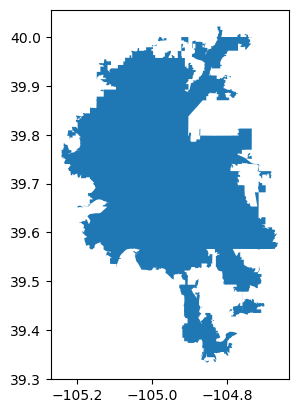

In [37]:
denver_boundary.plot()

In [38]:
denver_pixels = gpd.read_file("muni_boundaries/denver_pixels_ca.shp")

In [39]:
denver_pixels

id          left           top         right        bottom  \
0     2733.0 -1.168837e+07  4.837141e+06 -1.168737e+07  4.836141e+06   
1     2734.0 -1.168837e+07  4.836141e+06 -1.168737e+07  4.835141e+06   
2     2735.0 -1.168837e+07  4.835141e+06 -1.168737e+07  4.834141e+06   
3     2720.0 -1.168837e+07  4.850141e+06 -1.168737e+07  4.849141e+06   
4     2721.0 -1.168837e+07  4.849141e+06 -1.168737e+07  4.848141e+06   
...      ...           ...           ...           ...           ...   
3453  2728.0 -1.168837e+07  4.842141e+06 -1.168737e+07  4.841141e+06   
3454  2729.0 -1.168837e+07  4.841141e+06 -1.168737e+07  4.840141e+06   
3455  2730.0 -1.168837e+07  4.840141e+06 -1.168737e+07  4.839141e+06   
3456  2731.0 -1.168837e+07  4.839141e+06 -1.168737e+07  4.838141e+06   
3457  2732.0 -1.168837e+07  4.838141e+06 -1.168737e+07  4.837141e+06   

                                               geometry  
0     POLYGON ((-104.99843 39.80152, -104.98945 39.8...  
1     POLYGON ((-104.99843 39.79461, -104.98945 39.7...  
2     POLYGON ((-104.99843 39.78771, -104.98945 39.7...  
3     POLYGON ((-104.99843 39.89118, -104.98945 39.8...  
4     POLYGON ((-104.99843 39.88428, -104.98945 39.8...  
...                                                 ...  
3453  POLYGON ((-104.99843 39.83601, -104.98945 39.8...  
3454  POLYGON ((-104.99843 39.82912, -104.98945 39.8...  
3455  POLYGON ((-104.99843 39.82222, -104.98945 39.8...  
3456  POLYGON ((-104.99843 39.81532, -104.98945 39.8...  
3457  POLYGON ((-104.99843 39.80842, -104.98945 39.8...  

[3458 rows x 6 columns]

<Axes: >

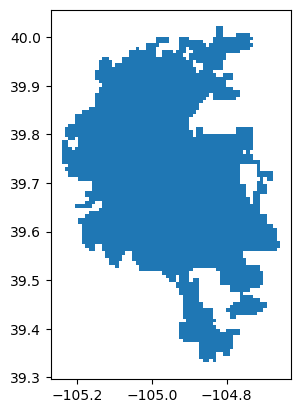

In [40]:
denver_pixels.plot()

## Prepping dataframes for plotting

In [113]:
all_start_end_points = trip_program_df.start_loc.append(trip_program_df.end_loc)
all_start_end_points

/tmp/ipykernel_185/1305180350.py:1: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_start_end_points = trip_program_df.start_loc.append(trip_program_df.end_loc)


0                        POINT (-107.8805606 37.276007)
1                       POINT (-107.8664569 37.2708361)
2                       POINT (-107.8810375 37.2741646)
3                       POINT (-107.8805793 37.2759903)
4                       POINT (-107.8812319 37.2741806)
                              ...                      
61491     POINT (-106.38221040030518 39.64329193202236)
61492      POINT (-106.3828356765339 39.64318045024082)
61493      POINT (-106.3806151333298 39.64595539021802)
61494    POINT (-106.38241867186306 39.643251605371674)
61495      POINT (-106.3837965676944 39.64332162452388)
Length: 122992, dtype: object

In [114]:
import shapely as shp

In [115]:
# I wanted to use shapely's from_geojson but it doesn't seem to be supported in this version
all_geo_start_end_points = gpd.GeoSeries(all_start_end_points.apply(lambda p: shp.geometry.Point(p.coords)), crs="EPSG:4269")
# all_geo_start_end_points = gpd.GeoSeries(all_start_end_points.apply(lambda p: shp.geometry.Point(p)), crs="EPSG:4269")

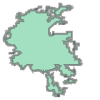

In [116]:
denver_boundary.geometry.iloc[0]

In [ ]:
##CAUTION - 2 definitions of all start or end within?

In [143]:
all_start_or_end_within = all_geo_start_end_points[all_geo_start_end_points.within(denver_boundary.geometry.iloc[0])]

In [118]:
all_start_or_end_within = trip_program_df_gdf[trip_program_df_gdf.within(denver_boundary.geometry.iloc[0])]

In [119]:
import matplotlib.pyplot as plt

<Axes: >

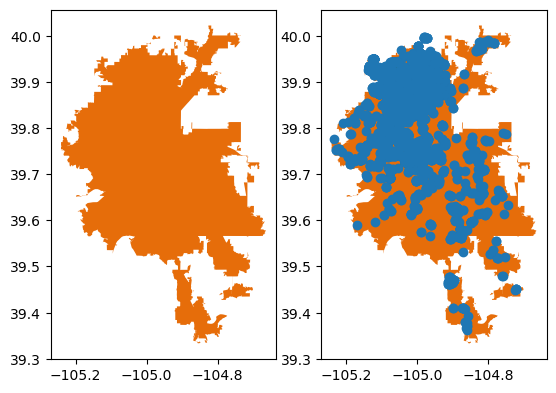

In [120]:
fig, ax_arr = plt.subplots(nrows=1, ncols=2)
denver_boundary.plot(color="#E66D0A", ax=ax_arr[0])
denver_boundary.plot(color="#E66D0A", ax=ax_arr[1])
all_start_or_end_within.plot(ax=ax_arr[1])

<Axes: >

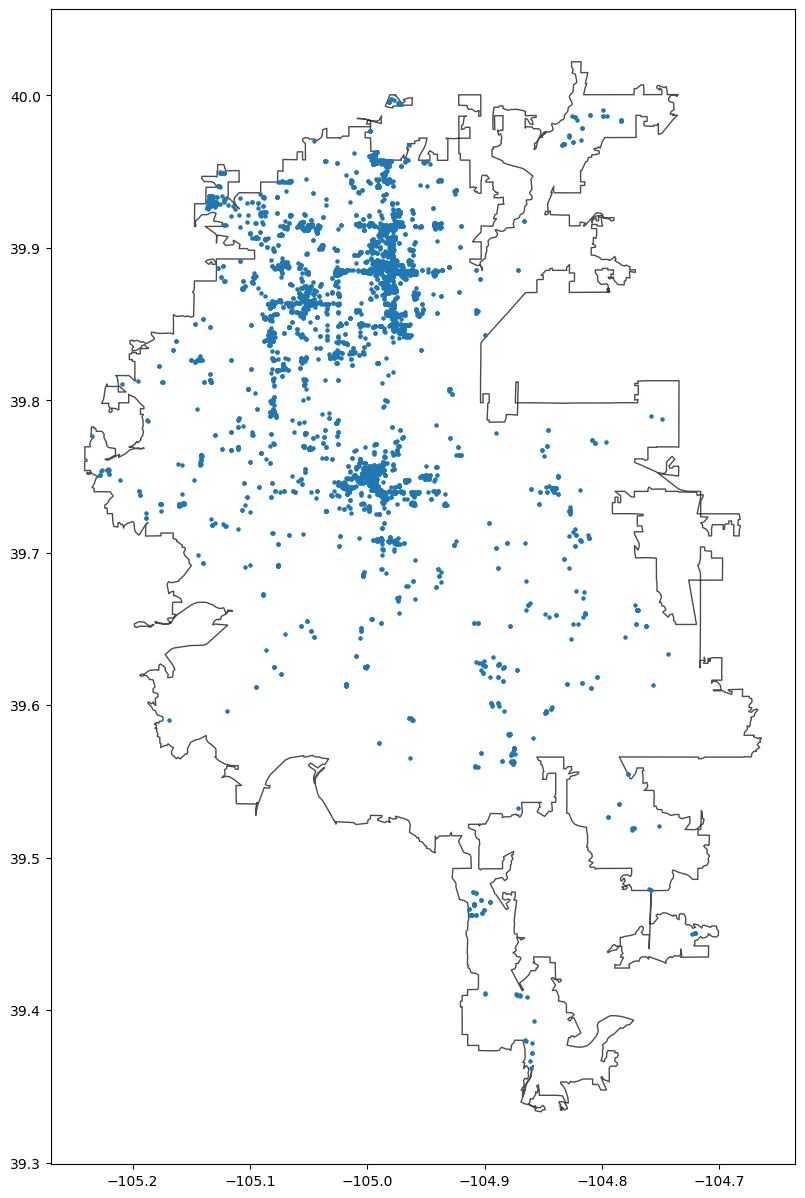

In [121]:
fig, ax = plt.subplots (figsize = (15,15))
denver_boundary.plot(ax = ax, alpha = 0.7, color = "white", edgecolor='black')
all_start_or_end_within.plot(ax = ax, markersize=5)

In [122]:
e_bike_trips = trip_program_df[trip_program_df.mode_confirm == 'pilot_ebike']; len(e_bike_trips)

17348

In [123]:
e_bike_trips = trip_program_df_gdf[trip_program_df_gdf.mode_confirm == 'pilot_ebike']; len(e_bike_trips)

17348

In [124]:
trip_program_df_gdf['mode_confirm'].unique()

array(['pilot_ebike', 'shared_ride', 'walk', 'skateboard', 'drove_alone',
       'bike', 'bus', 'free_shuttle', 'bikeshare', nan, 'taxi', 'train',
       'scootershare'], dtype=object)

In [125]:
car_like_trips = trip_program_df.query('mode_confirm == "drove_alone" | mode_confirm == "shared_ride" | mode_confirm == "taxi"'); len(car_like_trips)

30767

In [374]:
car_like_trips = trip_program_df_gdf.query('mode_confirm == "drove_alone" | mode_confirm == "shared_ride" | mode_confirm == "taxi"'); len(car_like_trips)

30767

In [127]:
e_bike_start_end_points = e_bike_trips.start_loc.append(e_bike_trips.end_loc); len(e_bike_start_end_points)

/tmp/ipykernel_185/2630283638.py:1: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  e_bike_start_end_points = e_bike_trips.start_loc.append(e_bike_trips.end_loc); len(e_bike_start_end_points)


34696

In [128]:
e_bike_geo_start_end_points = gpd.GeoSeries(e_bike_start_end_points.apply(lambda p: shp.geometry.Point(p.coords)), crs="EPSG:4269")

In [ ]:
# Caution two definitions for same var!!

In [157]:
e_bike_start_or_end_within = e_bike_geo_start_end_points[e_bike_geo_start_end_points.within(denver_boundary.geometry.iloc[0])]

In [155]:
e_bike_start_or_end_within = e_bike_trips[e_bike_trips.within(denver_boundary.geometry.iloc[0])]

In [131]:
car_like_start_end_points = car_like_trips.start_loc.append(car_like_trips.end_loc); len(car_like_start_end_points)

/tmp/ipykernel_185/2674960961.py:1: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  car_like_start_end_points = car_like_trips.start_loc.append(car_like_trips.end_loc); len(car_like_start_end_points)


61534

In [132]:
car_like_geo_start_end_points = gpd.GeoSeries(car_like_start_end_points.apply(lambda p: shp.geometry.Point(p.coords)), crs="EPSG:4269")

In [ ]:
# caution two definitions of the same var!

In [158]:
car_like_start_or_end_within = car_like_geo_start_end_points[car_like_geo_start_end_points.within(denver_boundary.geometry.iloc[0])]

In [156]:
car_like_start_or_end_within = car_like_trips[car_like_trips.within(denver_boundary.geometry.iloc[0])]

### General plotting of start/end points

<Axes: >

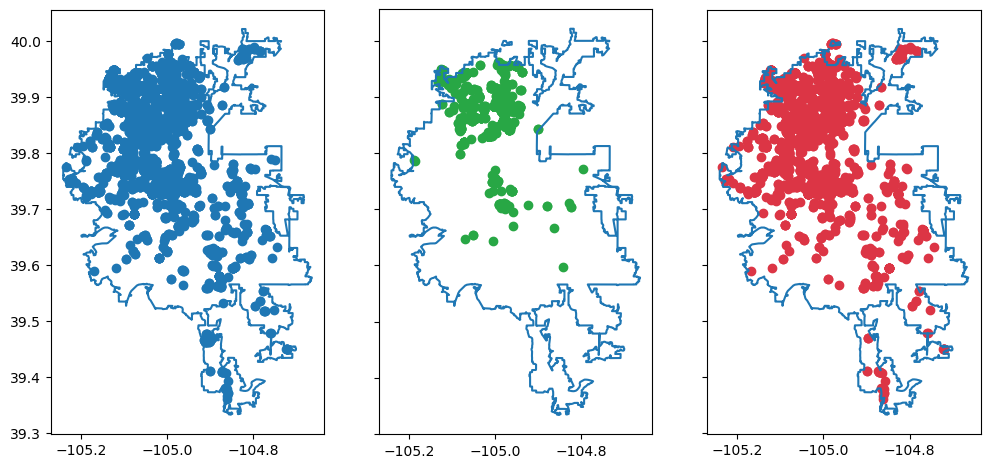

In [135]:
fig, ax_arr = plt.subplots(nrows=1, ncols=3, figsize=(12,6), sharex=True, sharey=True)
denver_boundary.boundary.plot(ax=ax_arr[0])
all_start_or_end_within.plot(ax=ax_arr[0])
denver_boundary.boundary.plot(ax=ax_arr[1])
e_bike_start_or_end_within.plot(color="#28a745", ax=ax_arr[1])
denver_boundary.boundary.plot(ax=ax_arr[2])
car_like_start_or_end_within.plot(color="#dc3545", ax=ax_arr[2])

<Axes: >

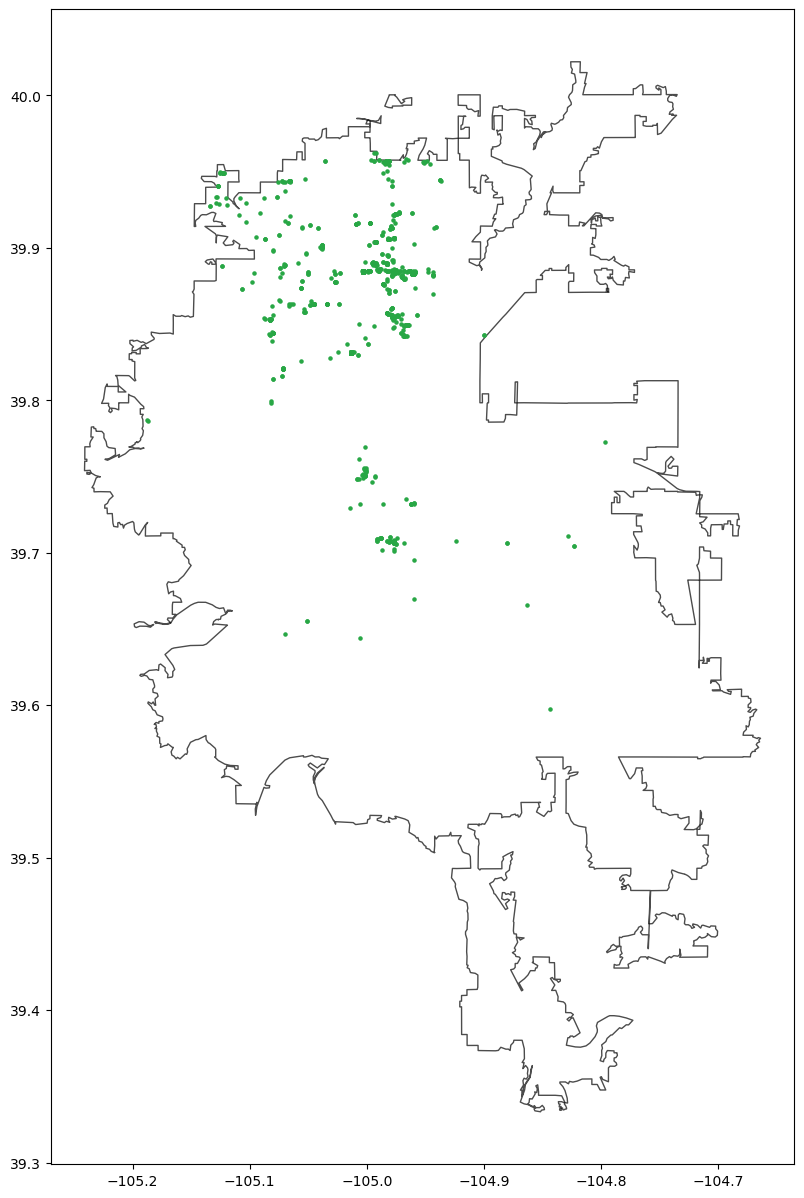

In [136]:
fig, ax = plt.subplots (figsize = (15,15))
denver_boundary.plot(ax = ax, alpha = 0.7, color = "white", edgecolor='black')
e_bike_start_or_end_within.plot(ax = ax, color="#28a745",markersize=5)

<Axes: >

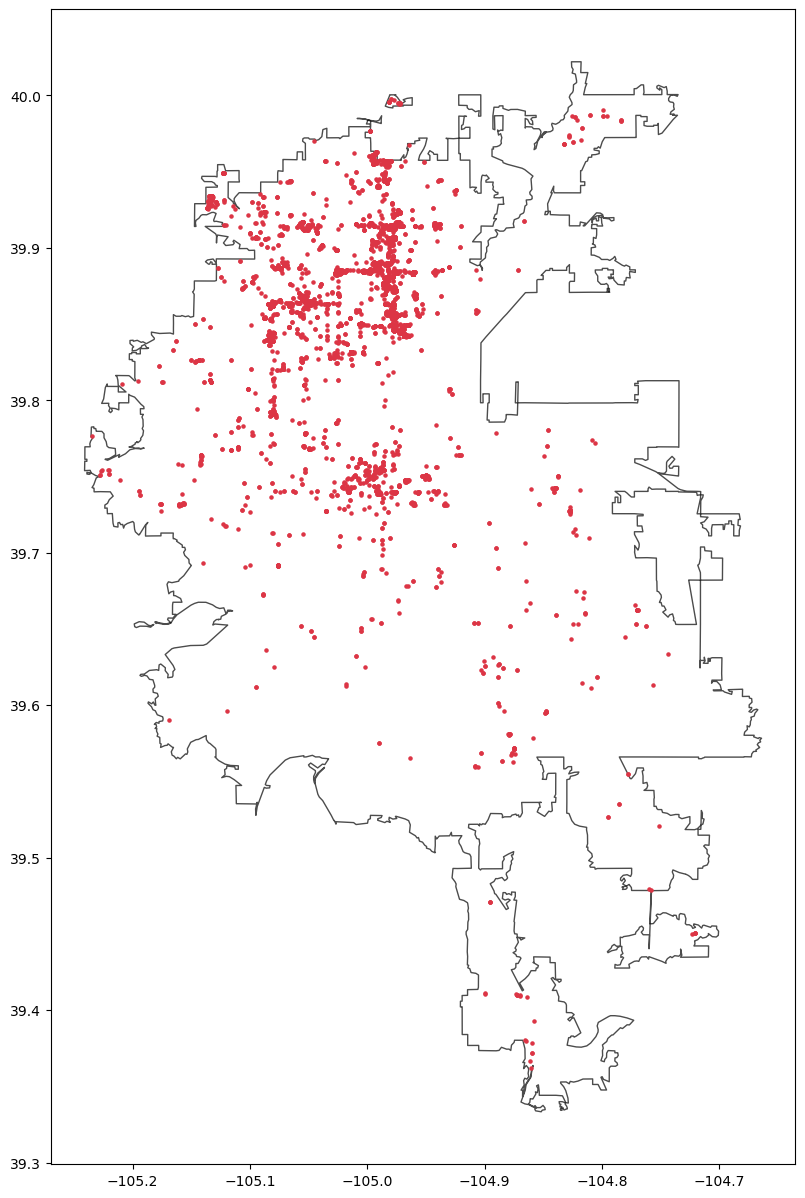

In [137]:
fig, ax = plt.subplots (figsize = (15,15))
denver_boundary.plot(ax = ax, alpha = 0.7, color = "white", edgecolor='black')
car_like_start_or_end_within.plot(ax = ax, color="#dc3545",markersize=5)

### Heatmap using folium

Example from: https://stackoverflow.com/a/65756840/4040267

In [144]:
import folium
import folium.plugins as fpl

In [145]:
denver_boundary.representative_point()

0    POINT (-104.96168 39.67707)
dtype: geometry

In [146]:
import numpy as np

In [147]:
all_start_or_end_within

2323     POINT (-105.08005 39.81034)
2325     POINT (-105.06393 39.75060)
2326     POINT (-105.07981 39.81026)
2357     POINT (-105.07106 39.91314)
2381     POINT (-105.06895 39.88347)
                    ...             
61413    POINT (-104.87123 39.53235)
61421    POINT (-104.84292 39.59891)
61422    POINT (-104.84345 39.59750)
61423    POINT (-104.86343 39.66606)
61424    POINT (-104.84846 39.65998)
Length: 13943, dtype: geometry

In [148]:
all_start_or_end_within.apply(lambda p: [p.coords])

2323                   [((-105.0800519, 39.8103368))]
2325                   [((-105.0639293, 39.7506018))]
2326                   [((-105.0798085, 39.8102584))]
2357                    [((-105.071062, 39.9131355))]
2381                    [((-105.0689516, 39.883472))]
                             ...                     
61413    [((-104.87123382644991, 39.53235419304648))]
61421    [((-104.84291857161664, 39.59891065553805))]
61422    [((-104.84345424073895, 39.59749584264233))]
61423     [((-104.86342684409799, 39.6660574212234))]
61424    [((-104.84846466406353, 39.65997532958193))]
Length: 13943, dtype: object

In [149]:
all_start_or_end_within.apply(lambda p: [p.y, p.x])

2323                   [39.8103368, -105.0800519]
2325                   [39.7506018, -105.0639293]
2326                   [39.8102584, -105.0798085]
2357                    [39.9131355, -105.071062]
2381                    [39.883472, -105.0689516]
                           ...                   
61413    [39.53235419304648, -104.87123382644991]
61421    [39.59891065553805, -104.84291857161664]
61422    [39.59749584264233, -104.84345424073895]
61423     [39.6660574212234, -104.86342684409799]
61424    [39.65997532958193, -104.84846466406353]
Length: 13943, dtype: object

In [150]:
np.array([all_start_or_end_within.x, all_start_or_end_within.y])

array([[-105.0800519 , -105.0639293 , -105.0798085 , ..., -104.84345424,
        -104.86342684, -104.84846466],
       [  39.8103368 ,   39.7506018 ,   39.8102584 , ...,   39.59749584,
          39.66605742,   39.65997533]])

In [151]:
map = folium.Map(
    location=(39.67707, -104.96168),
    zoom_start=11
)
fpl.HeatMap(all_start_or_end_within.apply(lambda p: [p.y, p.x])).add_to(map)
map

In [152]:
import branca.element as bre

In [159]:
all_map = folium.Map(
    location=(39.67707, -104.96168),
    zoom_start=11
)
fpl.HeatMap(all_start_or_end_within.apply(lambda p: [p.y, p.x])).add_to(all_map)

e_bike_map = folium.Map(
    location=(39.67707, -104.96168),
    zoom_start=11
)
fpl.HeatMap(e_bike_start_or_end_within.apply(lambda p: [p.y, p.x])).add_to(e_bike_map)

car_like_map = folium.Map(
    location=(39.67707, -104.96168),
    zoom_start=11
)
fpl.HeatMap(car_like_start_or_end_within.apply(lambda p: [p.y, p.x])).add_to(car_like_map)


fig = bre.Figure()
fig.add_subplot(1,3,1).add_child(all_map)
fig.add_subplot(1,3,2).add_child(e_bike_map)
fig.add_subplot(1,3,3).add_child(car_like_map)

In [160]:
#Import the Lib
from folium.plugins import HeatMap

#Make the list of Lat an Lng
lat = data.latitude.tolist()
lng = data.longitude.tolist()

#Create the Map
map = folium.Map(
    location=[39.67707, -104.96168],
    tiles='cartodbdark_matter',
    zoom_start=11
)
HeatMap(list(zip(lat, lng))).add_to(map)
map

NameError: name 'data' is not defined

### Heatmap using geopandas

Example from: https://gist.github.com/perrygeo/c426355e40037c452434

In [161]:
from scipy import ndimage

In [162]:
denver_bounds_extent = (denver_boundary.bounds)[["minx", "maxx", "maxy", "miny"]].values.tolist()[0]

In [163]:
def heatmap(d, bins=(100,100), smoothing=1.3, cmap='viridis', ax=None, bounds=None):
    heatmap, xedges, yedges = np.histogram2d(d.y, d.x, bins=bins)
    if bounds is None:
        extent = [yedges[0], yedges[-1], xedges[-1], xedges[0]]
        print(extent)
    else:
        extent = bounds
        print(extent)

    logheatmap = np.log(heatmap)
    logheatmap[np.isneginf(logheatmap)] = 0
    logheatmap = ndimage.filters.gaussian_filter(logheatmap, smoothing, mode='nearest')
    # heatmap = ndimage.filters.gaussian_filter(heatmap, smoothing, mode='nearest')
    
    if ax is None:
        plt.imshow(logheatmap, cmap=cmap, extent=extent)
        plt.colorbar()
        plt.gca().invert_yaxis()
        plt.show()
    else:
        ax.imshow(logheatmap, cmap=cmap, extent=extent)
        ax.invert_yaxis()

[-105.2349124, -104.7206622, 39.9978205, 39.362273017939245]


/tmp/ipykernel_185/2811692500.py:10: RuntimeWarning: divide by zero encountered in log
  logheatmap = np.log(heatmap)
/tmp/ipykernel_185/2811692500.py:12: DeprecationWarning: Please use `gaussian_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  logheatmap = ndimage.filters.gaussian_filter(logheatmap, smoothing, mode='nearest')


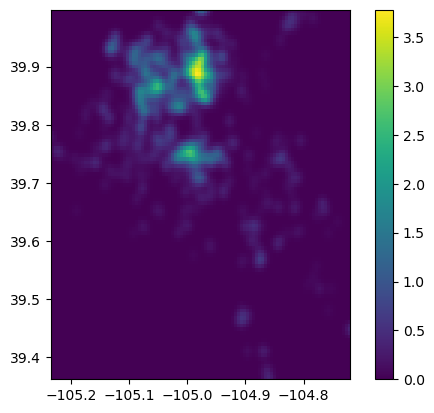

In [164]:
heatmap(all_start_or_end_within)

[-105.24098, -104.664079, 40.022008, 39.333386]
[-105.24098, -104.664079, 40.022008, 39.333386]


/tmp/ipykernel_185/2811692500.py:10: RuntimeWarning: divide by zero encountered in log
  logheatmap = np.log(heatmap)
/tmp/ipykernel_185/2811692500.py:12: DeprecationWarning: Please use `gaussian_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  logheatmap = ndimage.filters.gaussian_filter(logheatmap, smoothing, mode='nearest')
/tmp/ipykernel_185/2811692500.py:10: RuntimeWarning: divide by zero encountered in log
  logheatmap = np.log(heatmap)
/tmp/ipykernel_185/2811692500.py:12: DeprecationWarning: Please use `gaussian_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  logheatmap = ndimage.filters.gaussian_filter(logheatmap, smoothing, mode='nearest')


[-105.24098, -104.664079, 40.022008, 39.333386]


/tmp/ipykernel_185/2811692500.py:10: RuntimeWarning: divide by zero encountered in log
  logheatmap = np.log(heatmap)
/tmp/ipykernel_185/2811692500.py:12: DeprecationWarning: Please use `gaussian_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  logheatmap = ndimage.filters.gaussian_filter(logheatmap, smoothing, mode='nearest')


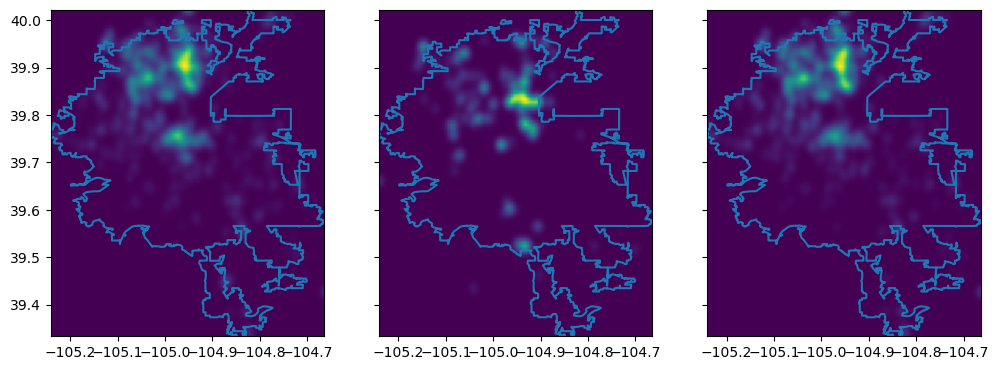

In [165]:
fig, ax_arr = plt.subplots(nrows=1, ncols=3, sharex=True, sharey=True, figsize=(12,6))
denver_boundary.boundary.plot(ax=ax_arr[0])
heatmap(all_start_or_end_within, ax=ax_arr[0], bounds=denver_bounds_extent)
denver_boundary.boundary.plot(ax=ax_arr[1])
heatmap(e_bike_start_or_end_within, ax=ax_arr[1], bounds=denver_bounds_extent)
denver_boundary.boundary.plot(ax=ax_arr[2])
heatmap(car_like_start_or_end_within, ax=ax_arr[2], bounds=denver_bounds_extent)

### Using seaborn

https://www.geeksforgeeks.org/kde-plot-visualization-with-pandas-and-seaborn/

In [166]:
import seaborn as sns

<Axes: >

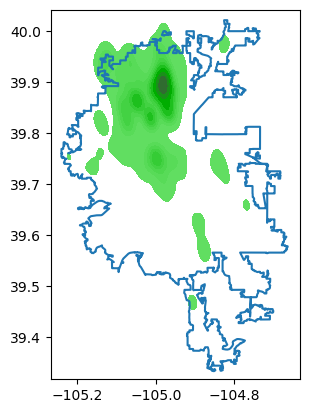

In [167]:
ax = sns.kdeplot(x=all_start_or_end_within.x, y=all_start_or_end_within.y, color='g', shade=True)
denver_boundary.boundary.plot(ax=ax)

<Axes: >

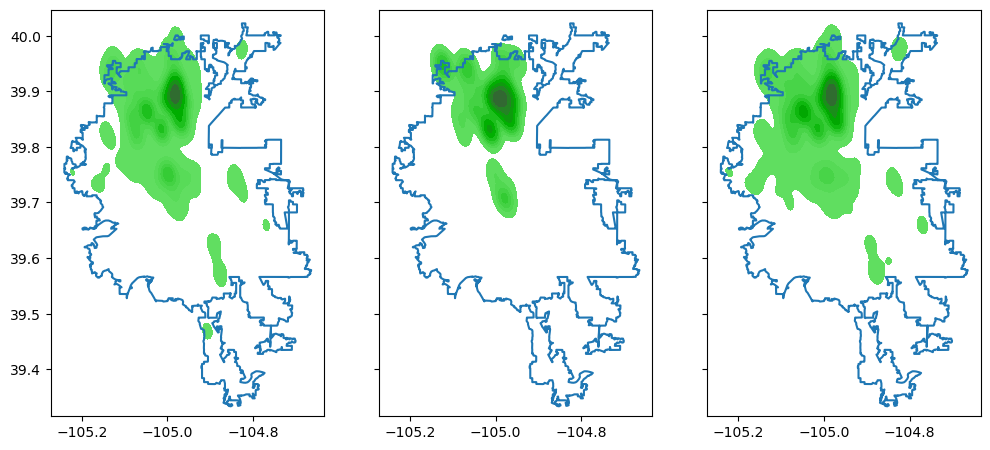

In [168]:
fig, ax_arr = plt.subplots(nrows=1, ncols=3, sharex=True, sharey=True, figsize=(12,6))
denver_boundary.boundary.plot(ax=ax_arr[0])
sns.kdeplot(x=all_start_or_end_within.x, y=all_start_or_end_within.y, ax=ax_arr[0], color='g', shade=True)
denver_boundary.boundary.plot(ax=ax_arr[1])
sns.kdeplot(x=e_bike_start_or_end_within.x, y=e_bike_start_or_end_within.y, ax=ax_arr[1], color='g', shade=True)
denver_boundary.boundary.plot(ax=ax_arr[2])
sns.kdeplot(x=car_like_start_or_end_within.x, y=car_like_start_or_end_within.y, ax=ax_arr[2], color='g', shade=True)

In [169]:
all_geo_start_end_points.head()

0    POINT (-107.88056 37.27601)
1    POINT (-107.86646 37.27084)
2    POINT (-107.88104 37.27416)
3    POINT (-107.88058 37.27599)
4    POINT (-107.88123 37.27418)
dtype: geometry

### Plot all e-bike trajectories (note that this will take several hours)

In [ ]:
def get_points_for_trip(user_id, trip_id):
    ts = esta.TimeSeries.get_time_series(user_id)
    return ts.get_data_df("analysis/recreated_location",
                         time_query=esda.get_time_query_for_trip_like("analysis/confirmed_trip", trip_id))

In [ ]:
# e_bike_all_trip_points = e_bike_trips.iloc[0:5].apply(lambda t: get_points_for_trip(t.user_id, t._id), axis=1)
e_bike_all_trip_points = e_bike_trips.apply(lambda t: get_points_for_trip(t.user_id, t._id), axis=1)

In [ ]:
import functools

In [ ]:
e_bike_all_points = functools.reduce(lambda x, y: x.append(y), e_bike_all_trip_points)

In [ ]:
e_bike_all_points["loc"]

In [ ]:
e_bike_all_points_gs = gpd.GeoSeries(e_bike_all_points["loc"].apply(lambda p: shp.geometry.Point(p['coordinates'])), crs="EPSG:4269")

In [ ]:
e_bike_all_points_within = e_bike_all_points_gs[e_bike_all_points_gs.within(denver_boundary.geometry.iloc[0])]

In [ ]:
fig, ax_arr = plt.subplots(nrows=1, ncols=1, figsize=(24,12))
# durham_boundary.plot(color="#E66D0A", ax=ax_arr[0])
denver_boundary.boundary.plot(ax=ax_arr)
e_bike_all_points_within.plot(ax=ax_arr, markersize=1)

### Final, most complicated version using pixels, and computing the ratio of e-bike to car_like trips

In [195]:
# First, let's just make a dataframe with the three different counts: total, e-bike, car-like, for each polygon
def get_counts(pixel_polygon):
    all_trip_count = np.count_nonzero(all_geo_start_end_points.within(pixel_polygon))
    e_bike_trip_count = np.count_nonzero(e_bike_geo_start_end_points.within(pixel_polygon))
    car_like_trip_count = np.count_nonzero(car_like_geo_start_end_points.within(pixel_polygon))
    return pd.Series([all_trip_count, e_bike_trip_count, car_like_trip_count])

In [171]:
# First, let's just make a dataframe with the three different counts: total, e-bike, car-like, for each polygon
def get_counts(pixel_polygon):
    all_trip_count = np.count_nonzero(all_start_or_end_within.within(pixel_polygon))
    e_bike_trip_count = np.count_nonzero(e_bike_start_or_end_within.within(pixel_polygon))
    car_like_trip_count = np.count_nonzero(car_like_start_or_end_within.within(pixel_polygon))
    return pd.Series([all_trip_count, e_bike_trip_count, car_like_trip_count])

#### Test with a small dataset

In [172]:
test_pixels = denver_pixels.head(n=50).copy()

In [173]:
test_pixels

id          left           top         right        bottom  \
0   2733.0 -1.168837e+07  4.837141e+06 -1.168737e+07  4.836141e+06   
1   2734.0 -1.168837e+07  4.836141e+06 -1.168737e+07  4.835141e+06   
2   2735.0 -1.168837e+07  4.835141e+06 -1.168737e+07  4.834141e+06   
3   2720.0 -1.168837e+07  4.850141e+06 -1.168737e+07  4.849141e+06   
4   2721.0 -1.168837e+07  4.849141e+06 -1.168737e+07  4.848141e+06   
5   2722.0 -1.168837e+07  4.848141e+06 -1.168737e+07  4.847141e+06   
6   2723.0 -1.168837e+07  4.847141e+06 -1.168737e+07  4.846141e+06   
7   2724.0 -1.168837e+07  4.846141e+06 -1.168737e+07  4.845141e+06   
8   2725.0 -1.168837e+07  4.845141e+06 -1.168737e+07  4.844141e+06   
9   2726.0 -1.168837e+07  4.844141e+06 -1.168737e+07  4.843141e+06   
10  2727.0 -1.168837e+07  4.843141e+06 -1.168737e+07  4.842141e+06   
11  2744.0 -1.168837e+07  4.826141e+06 -1.168737e+07  4.825141e+06   
12  2745.0 -1.168837e+07  4.825141e+06 -1.168737e+07  4.824141e+06   
13  2746.0 -1.168837e+07  4.824141e+06 -1.168737e+07  4.823141e+06   
14  2747.0 -1.168837e+07  4.823141e+06 -1.168737e+07  4.822141e+06   
15  2748.0 -1.168837e+07  4.822141e+06 -1.168737e+07  4.821141e+06   
16  2749.0 -1.168837e+07  4.821141e+06 -1.168737e+07  4.820141e+06   
17  2750.0 -1.168837e+07  4.820141e+06 -1.168737e+07  4.819141e+06   
18  2751.0 -1.168837e+07  4.819141e+06 -1.168737e+07  4.818141e+06   
19  2736.0 -1.168837e+07  4.834141e+06 -1.168737e+07  4.833141e+06   
20  2737.0 -1.168837e+07  4.833141e+06 -1.168737e+07  4.832141e+06   
21  2738.0 -1.168837e+07  4.832141e+06 -1.168737e+07  4.831141e+06   
22  2739.0 -1.168837e+07  4.831141e+06 -1.168737e+07  4.830141e+06   
23  2740.0 -1.168837e+07  4.830141e+06 -1.168737e+07  4.829141e+06   
24  2741.0 -1.168837e+07  4.829141e+06 -1.168737e+07  4.828141e+06   
25  2742.0 -1.168837e+07  4.828141e+06 -1.168737e+07  4.827141e+06   
26  2743.0 -1.168837e+07  4.827141e+06 -1.168737e+07  4.826141e+06   
27  2712.0 -1.168837e+07  4.858141e+06 -1.168737e+07  4.857141e+06   
28  2713.0 -1.168837e+07  4.857141e+06 -1.168737e+07  4.856141e+06   
29  2714.0 -1.168837e+07  4.856141e+06 -1.168737e+07  4.855141e+06   
30  2715.0 -1.168837e+07  4.855141e+06 -1.168737e+07  4.854141e+06   
31  2716.0 -1.168837e+07  4.854141e+06 -1.168737e+07  4.853141e+06   
32  2717.0 -1.168837e+07  4.853141e+06 -1.168737e+07  4.852141e+06   
33  2718.0 -1.168837e+07  4.852141e+06 -1.168737e+07  4.851141e+06   
34  2719.0 -1.168837e+07  4.851141e+06 -1.168737e+07  4.850141e+06   
35  2706.0 -1.168837e+07  4.864141e+06 -1.168737e+07  4.863141e+06   
36  2707.0 -1.168837e+07  4.863141e+06 -1.168737e+07  4.862141e+06   
37  2708.0 -1.168837e+07  4.862141e+06 -1.168737e+07  4.861141e+06   
38  2709.0 -1.168837e+07  4.861141e+06 -1.168737e+07  4.860141e+06   
39  2710.0 -1.168837e+07  4.860141e+06 -1.168737e+07  4.859141e+06   
40  2711.0 -1.168837e+07  4.859141e+06 -1.168737e+07  4.858141e+06   
41  2664.0 -1.168937e+07  4.806141e+06 -1.168837e+07  4.805141e+06   
42  2665.0 -1.168937e+07  4.805141e+06 -1.168837e+07  4.804141e+06   
43  2666.0 -1.168937e+07  4.804141e+06 -1.168837e+07  4.803141e+06   
44  2667.0 -1.168937e+07  4.803141e+06 -1.168837e+07  4.802141e+06   
45  2668.0 -1.168937e+07  4.802141e+06 -1.168837e+07  4.801141e+06   
46  2669.0 -1.168937e+07  4.801141e+06 -1.168837e+07  4.800141e+06   
47  2670.0 -1.168937e+07  4.800141e+06 -1.168837e+07  4.799141e+06   
48  2671.0 -1.168937e+07  4.799141e+06 -1.168837e+07  4.798141e+06   
49  2656.0 -1.168937e+07  4.814141e+06 -1.168837e+07  4.813141e+06   

                                             geometry  
0   POLYGON ((-104.99843 39.80152, -104.98945 39.8...  
1   POLYGON ((-104.99843 39.79461, -104.98945 39.7...  
2   POLYGON ((-104.99843 39.78771, -104.98945 39.7...  
3   POLYGON ((-104.99843 39.89118, -104.98945 39.8...  
4   POLYGON ((-104.99843 39.88428, -104.98945 39.8...  
5   POLYGON ((-104.99843 39.87739, -104.98945 39.8...  
6   POLYGON ((-104.99843 39.87050, -104.98945

In [174]:
test_pixels[["all_trip_count", "e_bike_trip_count", "car_like_trip_count"]] = test_pixels.geometry.apply(lambda pp: get_counts(pp))

In [175]:
test_pixels.head()

id          left           top         right        bottom  \
0  2733.0 -1.168837e+07  4.837141e+06 -1.168737e+07  4.836141e+06   
1  2734.0 -1.168837e+07  4.836141e+06 -1.168737e+07  4.835141e+06   
2  2735.0 -1.168837e+07  4.835141e+06 -1.168737e+07  4.834141e+06   
3  2720.0 -1.168837e+07  4.850141e+06 -1.168737e+07  4.849141e+06   
4  2721.0 -1.168837e+07  4.849141e+06 -1.168737e+07  4.848141e+06   

                                            geometry  all_trip_count  \
0  POLYGON ((-104.99843 39.80152, -104.98945 39.8...               0   
1  POLYGON ((-104.99843 39.79461, -104.98945 39.7...               0   
2  POLYGON ((-104.99843 39.78771, -104.98945 39.7...               0   
3  POLYGON ((-104.99843 39.89118, -104.98945 39.8...             249   
4  POLYGON ((-104.99843 39.88428, -104.98945 39.8...              17   

   e_bike_trip_count  car_like_trip_count  
0                  0                    0  
1                  0                    0  
2                  0                    0  
3                 70                  150  
4                  0                   10

<Axes: >

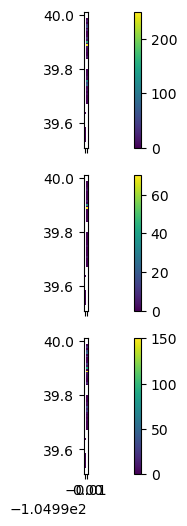

In [176]:
fig, ax_arr = plt.subplots(nrows=3, ncols=1, figsize=(12,6), sharex=True, sharey=True)
test_pixels.plot(column="all_trip_count", legend=True, ax=ax_arr[0])
test_pixels.plot(column="e_bike_trip_count", legend=True, ax=ax_arr[1])
test_pixels.plot(column="car_like_trip_count", legend=True, ax=ax_arr[2])

In [177]:
test_pixels["e_bike_2_car_like"] = test_pixels.e_bike_trip_count / test_pixels.car_like_trip_count

In [178]:
test_pixels.head()

id          left           top         right        bottom  \
0  2733.0 -1.168837e+07  4.837141e+06 -1.168737e+07  4.836141e+06   
1  2734.0 -1.168837e+07  4.836141e+06 -1.168737e+07  4.835141e+06   
2  2735.0 -1.168837e+07  4.835141e+06 -1.168737e+07  4.834141e+06   
3  2720.0 -1.168837e+07  4.850141e+06 -1.168737e+07  4.849141e+06   
4  2721.0 -1.168837e+07  4.849141e+06 -1.168737e+07  4.848141e+06   

                                            geometry  all_trip_count  \
0  POLYGON ((-104.99843 39.80152, -104.98945 39.8...               0   
1  POLYGON ((-104.99843 39.79461, -104.98945 39.7...               0   
2  POLYGON ((-104.99843 39.78771, -104.98945 39.7...               0   
3  POLYGON ((-104.99843 39.89118, -104.98945 39.8...             249   
4  POLYGON ((-104.99843 39.88428, -104.98945 39.8...              17   

   e_bike_trip_count  car_like_trip_count  e_bike_2_car_like  
0                  0                    0                NaN  
1                  0                    0                NaN  
2                  0                    0                NaN  
3                 70                  150           0.466667  
4                  0                   10           0.000000

In [179]:
test_pixels.e_bike_2_car_like.dropna()

3     0.466667
4     0.000000
5     0.000000
6     0.000000
9     0.066667
11    0.000000
13    1.333333
16    0.000000
20    0.000000
21    0.000000
22    0.000000
23    0.230769
24    0.000000
25    0.000000
26    0.000000
27    0.000000
29    0.000000
30    0.000000
31    0.240000
32    0.000000
33    0.402299
34    0.000000
36    0.000000
38    0.057143
39    0.076923
Name: e_bike_2_car_like, dtype: float64

<Axes: >

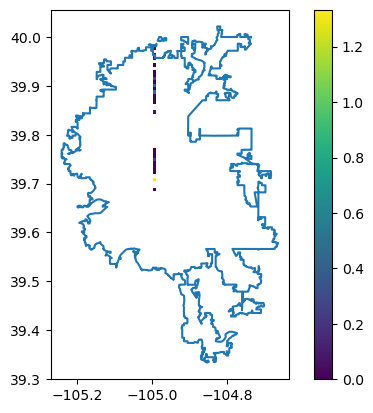

In [180]:
ax = denver_boundary.boundary.plot()
test_pixels.plot(column="e_bike_2_car_like", ax=ax, legend=True)

### And now for the final version

In [196]:
denver_pixels_all = denver_pixels.copy()
denver_pixels_all[["all_trip_count", "e_bike_trip_count", "car_like_trip_count"]] = denver_pixels_all.geometry.apply(lambda pp: get_counts(pp))

In [197]:
denver_pixels_all

id          left           top         right        bottom  \
0     2733.0 -1.168837e+07  4.837141e+06 -1.168737e+07  4.836141e+06   
1     2734.0 -1.168837e+07  4.836141e+06 -1.168737e+07  4.835141e+06   
2     2735.0 -1.168837e+07  4.835141e+06 -1.168737e+07  4.834141e+06   
3     2720.0 -1.168837e+07  4.850141e+06 -1.168737e+07  4.849141e+06   
4     2721.0 -1.168837e+07  4.849141e+06 -1.168737e+07  4.848141e+06   
...      ...           ...           ...           ...           ...   
3453  2728.0 -1.168837e+07  4.842141e+06 -1.168737e+07  4.841141e+06   
3454  2729.0 -1.168837e+07  4.841141e+06 -1.168737e+07  4.840141e+06   
3455  2730.0 -1.168837e+07  4.840141e+06 -1.168737e+07  4.839141e+06   
3456  2731.0 -1.168837e+07  4.839141e+06 -1.168737e+07  4.838141e+06   
3457  2732.0 -1.168837e+07  4.838141e+06 -1.168737e+07  4.837141e+06   

                                               geometry  all_trip_count  \
0     POLYGON ((-104.99843 39.80152, -104.98945 39.8...               0   
1     POLYGON ((-104.99843 39.79461, -104.98945 39.7...               0   
2     POLYGON ((-104.99843 39.78771, -104.98945 39.7...               0   
3     POLYGON ((-104.99843 39.89118, -104.98945 39.8...             249   
4     POLYGON ((-104.99843 39.88428, -104.98945 39.8...              17   
...                                                 ...             ...   
3453  POLYGON ((-104.99843 39.83601, -104.98945 39.8...               0   
3454  POLYGON ((-104.99843 39.82912, -104.98945 39.8...              11   
3455  POLYGON ((-104.99843 39.82222, -104.98945 39.8...               0   
3456  POLYGON ((-104.99843 39.81532, -104.98945 39.8...               0   
3457  POLYGON ((-104.99843 39.80842, -104.98945 39.8...               0   

      e_bike_trip_count  car_like_trip_count  
0                     0                    0  
1                     0                    0  
2                     0                    0  
3                    70                  150  
4                     0                   10  
...                 ...                  ...  
3453                  0                    0  
3454                  0                   11  
3455                  0                    0  
3456                  0                    0  
3457                  0                    0  

[3458 rows x 9 columns]

<Axes: >

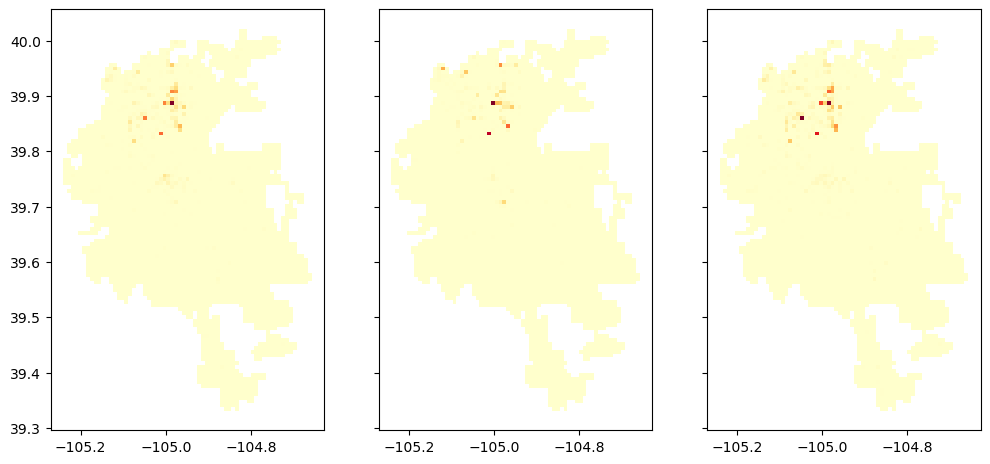

In [198]:
fig, ax_arr = plt.subplots(nrows=1, ncols=3, figsize=(12,6), sharex=True, sharey=True)
denver_pixels_all.plot(column="all_trip_count", ax=ax_arr[0], cmap="YlOrRd")
denver_pixels_all.plot(column="e_bike_trip_count", ax=ax_arr[1], cmap="YlOrRd")
denver_pixels_all.plot(column="car_like_trip_count", ax=ax_arr[2], cmap="YlOrRd")

In [199]:
denver_pixels_all["e_bike_2_car_like"] = denver_pixels_all.e_bike_trip_count / denver_pixels_all.car_like_trip_count

In [200]:
denver_pixels_all.replace(np.inf, denver_pixels_all.replace(np.inf, 0).e_bike_2_car_like.max(), inplace=True)

In [201]:
denver_pixels_all[denver_pixels_all.e_bike_2_car_like > 5]

id          left           top         right        bottom  \
64    2637.0 -1.168937e+07  4.833141e+06 -1.168837e+07  4.832141e+06   
95    2618.0 -1.168937e+07  4.852141e+06 -1.168837e+07  4.851141e+06   
137   3046.0 -1.168537e+07  4.824141e+06 -1.168437e+07  4.823141e+06   
160   3021.0 -1.168537e+07  4.849141e+06 -1.168437e+07  4.848141e+06   
170   3015.0 -1.168537e+07  4.855141e+06 -1.168437e+07  4.854141e+06   
175   3036.0 -1.168537e+07  4.834141e+06 -1.168437e+07  4.833141e+06   
199   2946.0 -1.168637e+07  4.824141e+06 -1.168537e+07  4.823141e+06   
200   2947.0 -1.168637e+07  4.823141e+06 -1.168537e+07  4.822141e+06   
227   2912.0 -1.168637e+07  4.858141e+06 -1.168537e+07  4.857141e+06   
387   2154.0 -1.169437e+07  4.816141e+06 -1.169337e+07  4.815141e+06   
539   2515.0 -1.169037e+07  4.855141e+06 -1.168937e+07  4.854141e+06   
976   2012.0 -1.169537e+07  4.858141e+06 -1.169437e+07  4.857141e+06   
998   1955.0 -1.169637e+07  4.815141e+06 -1.169537e+07  4.814141e+06   
1047  1913.0 -1.169637e+07  4.857141e+06 -1.169537e+07  4.856141e+06   
1236  1211.0 -1.170337e+07  4.859141e+06 -1.170237e+07  4.858141e+06   
1238  1212.0 -1.170337e+07  4.858141e+06 -1.170237e+07  4.857141e+06   
1351  5208.0 -1.166337e+07  4.862141e+06 -1.166237e+07  4.861141e+06   
1557  1413.0 -1.170137e+07  4.857141e+06 -1.170037e+07  4.856141e+06   
1645  1320.0 -1.170237e+07  4.850141e+06 -1.170137e+07  4.849141e+06   
1868   635.0 -1.170937e+07  4.835141e+06 -1.170837e+07  4.834141e+06   
1918  4647.0 -1.166937e+07  4.823141e+06 -1.166837e+07  4.822141e+06   
1971   535.0 -1.171037e+07  4.835141e+06 -1.170937e+07  4.834141e+06   
2129  4937.0 -1.166637e+07  4.833141e+06 -1.166537e+07  4.832141e+06   
2461  4546.0 -1.167037e+07  4.824141e+06 -1.166937e+07  4.823141e+06   
2734  3727.0 -1.167837e+07  4.843141e+06 -1.167737e+07  4.842141e+06   
2891  4046.0 -1.167537e+07  4.824141e+06 -1.167437e+07  4.823141e+06   
3132  3210.0 -1.168337e+07  4.860141e+06 -1.168237e+07  4.859141e+06   
3150  3220.0 -1.168337e+07  4.850141e+06 -1.168237e+07  4.849141e+06   
3151  3221.0 -1.168337e+07  4.849141e+06 -1.168237e+07  4.848141e+06   
3186  3152.0 -1.168437e+07  4.818141e+06 -1.168337e+07  4.817141e+06   
3206  3110.0 -1.168437e+07  4.860141e+06 -1.168337e+07  4.859141e+06   

                                               geometry  all_trip_count  \
64    POLYGON ((-105.00742 39.77390, -104.99843 39.7...               1   
95    POLYGON ((-105.00742 39.90496, -104.99843 39.9...               2   
137   POLYGON ((-104.97149 39.71174, -104.96250 39.7...               2   
160   POLYGON ((-104.97149 39.88428, -104.96250 39.8...              42   
170   POLYGON ((-104.97149 39.92563, -104.96250 39.9...               1   
175   POLYGON ((-104.97149 39.78081, -104.96250 39.7...               6   
199   POLYGON ((-104.98047 39.71174, -104.97149 39.7...              57   
200   POLYGON ((-104.98047 39.70483, -104.97149 39.7...               3   
227   POLYGON ((-104.98047 39.94629, -104.97149 39.9...               4   
387   POLYGON ((-105.05233 39.65643, -105.04335 39.6...               2   
539   POLYGON ((-105.01640 39.92563, -105.00742 39.9...               2   
976   POLYGON ((-105.06132 39.94629, -105.05233 39.9...               1   
998   POLYGON ((-105.07030 39.64952, -105.06132 39.6...               1   
1047  POLYGON ((-105.07030 39.93941, -105.06132 39.9...               1   
1236  POLYGON ((-105.13318 39.95318, -105.12420 39.9...               7   
1238  POLYGON ((-105.13318 39.94629, -105.12420 39.9...               5   
1351  POLYGON ((-104.77386 39.97384, -104.76487 39.9...               1   
1557  POLYGON ((-105.11522 39.93941, -105.10623 39.9...               2   
1645  POLYGON ((-105.12420 39.89118, -105.11522 39.8...               2   
1868  POLYGON ((-105.18708 39.78771, -105.17810 39.7...               1   
1918  POLYGON ((-104.82775 39.70483, -104.81877 39.7...               2   
1971  POLYGON ((-105.19606 39.78771, -105.18708 39.7...

In [202]:
denver_pixels_all

id          left           top         right        bottom  \
0     2733.0 -1.168837e+07  4.837141e+06 -1.168737e+07  4.836141e+06   
1     2734.0 -1.168837e+07  4.836141e+06 -1.168737e+07  4.835141e+06   
2     2735.0 -1.168837e+07  4.835141e+06 -1.168737e+07  4.834141e+06   
3     2720.0 -1.168837e+07  4.850141e+06 -1.168737e+07  4.849141e+06   
4     2721.0 -1.168837e+07  4.849141e+06 -1.168737e+07  4.848141e+06   
...      ...           ...           ...           ...           ...   
3453  2728.0 -1.168837e+07  4.842141e+06 -1.168737e+07  4.841141e+06   
3454  2729.0 -1.168837e+07  4.841141e+06 -1.168737e+07  4.840141e+06   
3455  2730.0 -1.168837e+07  4.840141e+06 -1.168737e+07  4.839141e+06   
3456  2731.0 -1.168837e+07  4.839141e+06 -1.168737e+07  4.838141e+06   
3457  2732.0 -1.168837e+07  4.838141e+06 -1.168737e+07  4.837141e+06   

                                               geometry  all_trip_count  \
0     POLYGON ((-104.99843 39.80152, -104.98945 39.8...               0   
1     POLYGON ((-104.99843 39.79461, -104.98945 39.7...               0   
2     POLYGON ((-104.99843 39.78771, -104.98945 39.7...               0   
3     POLYGON ((-104.99843 39.89118, -104.98945 39.8...             249   
4     POLYGON ((-104.99843 39.88428, -104.98945 39.8...              17   
...                                                 ...             ...   
3453  POLYGON ((-104.99843 39.83601, -104.98945 39.8...               0   
3454  POLYGON ((-104.99843 39.82912, -104.98945 39.8...              11   
3455  POLYGON ((-104.99843 39.82222, -104.98945 39.8...               0   
3456  POLYGON ((-104.99843 39.81532, -104.98945 39.8...               0   
3457  POLYGON ((-104.99843 39.80842, -104.98945 39.8...               0   

      e_bike_trip_count  car_like_trip_count  e_bike_2_car_like  
0                     0                    0                NaN  
1                     0                    0                NaN  
2                     0                    0                NaN  
3                    70                  150           0.466667  
4                     0                   10           0.000000  
...                 ...                  ...                ...  
3453                  0                    0                NaN  
3454                  0                   11           0.000000  
3455                  0                    0                NaN  
3456                  0                    0                NaN  
3457                  0                    0                NaN  

[3458 rows x 10 columns]

<Axes: >

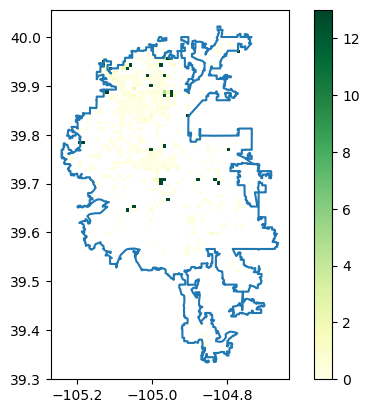

In [203]:
ax = denver_boundary.boundary.plot()
denver_pixels_all.plot(column="e_bike_2_car_like", ax=ax, cmap="YlGn", legend=True)

<Axes: ylabel='Frequency'>

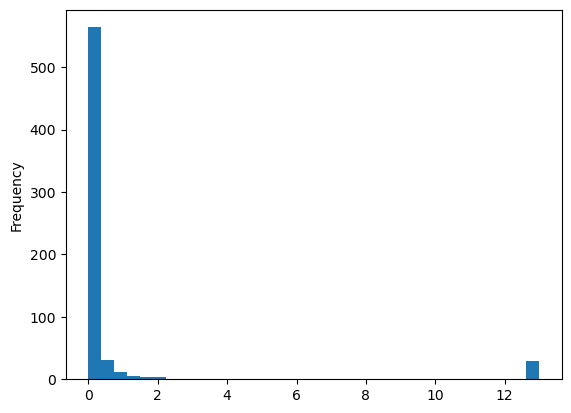

In [204]:
denver_pixels_all.e_bike_2_car_like.dropna().plot(kind="hist", bins=35)

In [205]:
np.count_nonzero(denver_pixels_all.e_bike_2_car_like < 0.5), np.count_nonzero(denver_pixels_all.e_bike_2_car_like >= 0.5)

(572, 79)

In [206]:
108 * 100 / 658

16.41337386018237

In [207]:
denver_pixels_all["e_bike_better"] = pd.Categorical(denver_pixels_all.e_bike_2_car_like >= 1)

<Axes: >

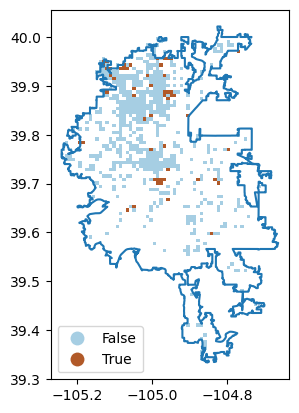

In [208]:
ax = denver_boundary.boundary.plot()
denver_pixels_all.dropna(axis='rows', how='any').plot(column = "e_bike_better", ax = ax, legend=True, legend_kwds={"loc": "lower left"}, categorical=True, cmap="Paired", figsize=(12,6))

<Axes: title={'center': 'Pixels where e-bikes are used more often than driving'}, ylabel='id'>

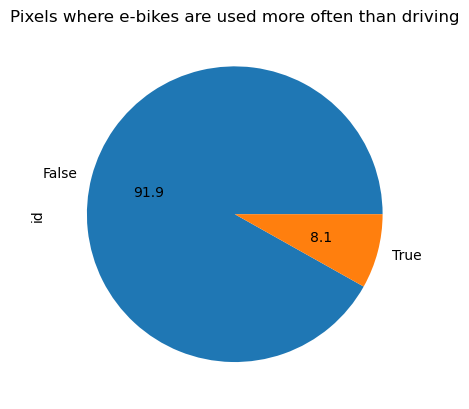

In [209]:
denver_pixels_all.dropna().groupby("e_bike_better").count().id.plot(kind="pie", autopct='%.1f', title="Pixels where e-bikes are used more often than driving")

In [45]:
denver_pixels_all["e_bike_gt_50_pct"] = pd.Categorical(denver_pixels_all.e_bike_2_car_like >= 0.5)

<AxesSubplot:title={'center':'Pixels where e-bike trips are least 50% of driving trips'}, ylabel='id'>

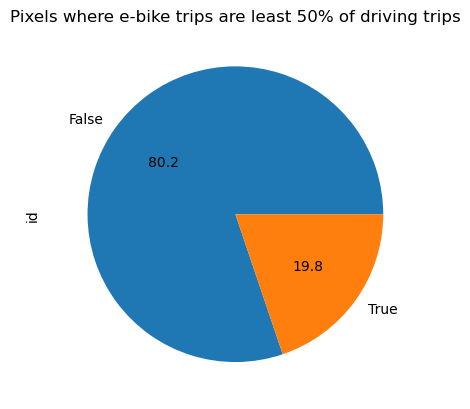

In [46]:
denver_pixels_all.dropna().groupby("e_bike_gt_50_pct").count().id.plot(kind="pie", autopct='%.1f', title="Pixels where e-bike trips are least 50% of driving trips")

## Another complex check - does this differ across programs

In [213]:
def get_endpoints_within(trip_df):
    start_end_points = trip_df.start_loc.append(trip_df.end_loc)
    geo_start_end_points = gpd.GeoSeries(start_end_points.apply(lambda p: shp.geometry.Point(p.coords)), crs="EPSG:4269")
    start_or_end_within = geo_start_end_points[geo_start_end_points.within(denver_boundary.geometry.iloc[0])]
    return start_or_end_within

In [214]:
def get_all_e_bike_car_like(trip_df):
    return {"all": get_endpoints_within(trip_df),
            "e_bike": get_endpoints_within(trip_df.query('mode_confirm == "pilot_ebike"')),
            "car_like": get_endpoints_within(trip_df.query('mode_confirm == "drove_alone" | mode_confirm == "shared_ride" | mode_confirm == "taxi"'))
           }

In [215]:
sc_trips_split = get_all_e_bike_car_like(trip_program_df.query("program == 'sc'"))

/tmp/ipykernel_185/127870489.py:2: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  start_end_points = trip_df.start_loc.append(trip_df.end_loc)
/tmp/ipykernel_185/127870489.py:2: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  start_end_points = trip_df.start_loc.append(trip_df.end_loc)
/tmp/ipykernel_185/127870489.py:2: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  start_end_points = trip_df.start_loc.append(trip_df.end_loc)


In [216]:
prepilot_trips_split = get_all_e_bike_car_like(trip_program_df.query("program == 'prepilot'"))

/tmp/ipykernel_185/127870489.py:2: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  start_end_points = trip_df.start_loc.append(trip_df.end_loc)
/tmp/ipykernel_185/127870489.py:2: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  start_end_points = trip_df.start_loc.append(trip_df.end_loc)
/tmp/ipykernel_185/127870489.py:2: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  start_end_points = trip_df.start_loc.append(trip_df.end_loc)


In [217]:
def get_kde_plots(trips_split):
    fig, ax_arr = plt.subplots(nrows=1, ncols=3, sharex=True, sharey=True, figsize=(12,6))
    denver_boundary.boundary.plot(ax=ax_arr[0])
    sns.kdeplot(x=trips_split["all"].x, y=trips_split["all"].y, ax=ax_arr[0], color='g', shade=True)
    denver_boundary.boundary.plot(ax=ax_arr[1])
    sns.kdeplot(x=trips_split["e_bike"].x, y=trips_split["e_bike"].y, ax=ax_arr[1], color='g', shade=True)
    denver_boundary.boundary.plot(ax=ax_arr[2])
    sns.kdeplot(x=trips_split["car_like"].x, y=trips_split["car_like"].y, ax=ax_arr[2], color='g', shade=True)
    # return fig

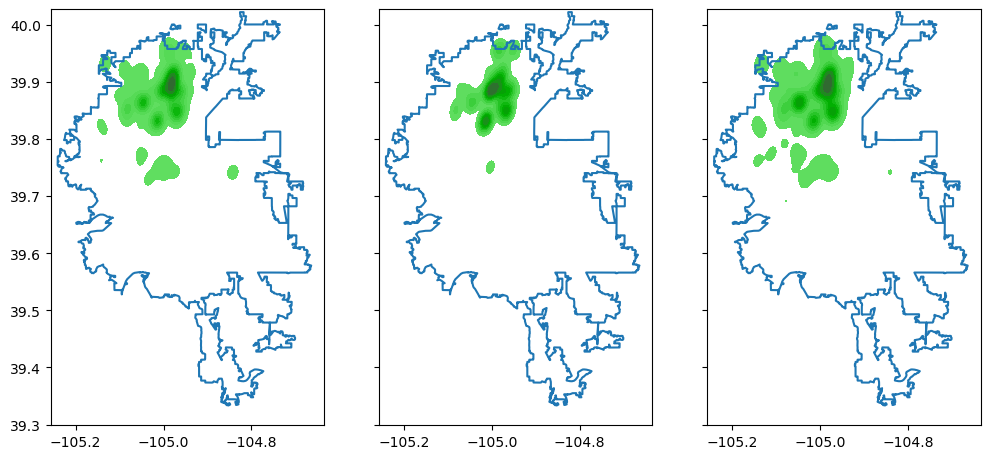

In [218]:
get_kde_plots(sc_trips_split)

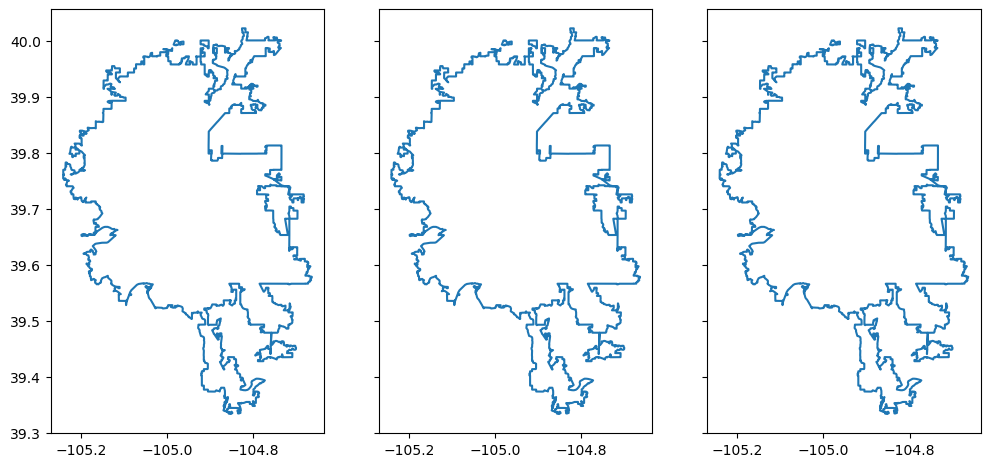

In [219]:
get_kde_plots(prepilot_trips_split)

In [220]:
def get_scatter_plots(trips_split):
    fig, ax_arr = plt.subplots(nrows=1, ncols=3, sharex=True, sharey=True, figsize=(12,6))
    denver_boundary.boundary.plot(ax=ax_arr[0])
    trips_split["all"].plot(ax=ax_arr[0])
    ax_arr[0].set_title("all trips")
    denver_boundary.boundary.plot(ax=ax_arr[1])
    trips_split["e_bike"].plot(color="#28a745", ax=ax_arr[1])
    ax_arr[1].set_title("e-bike trips")
    denver_boundary.boundary.plot(ax=ax_arr[2])
    trips_split["car_like"].plot(color="#dc3545", ax=ax_arr[2])
    ax_arr[2].set_title("car trips")
    # return fig

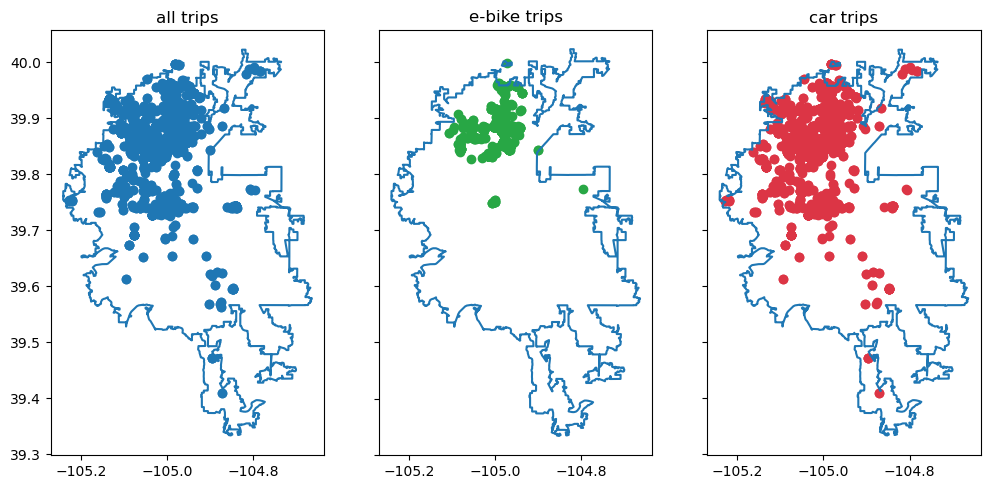

In [221]:
get_scatter_plots(sc_trips_split)

ValueError: aspect must be finite and positive 

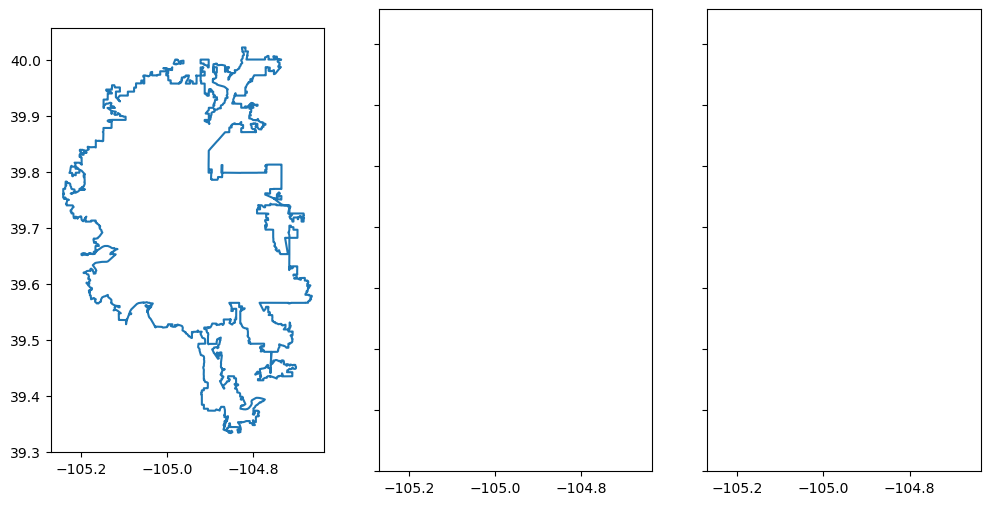

In [222]:
get_scatter_plots(prepilot_trips_split)

In [223]:
# First, let's just make a dataframe with the three different counts: total, e-bike, car-like, for each polygon
def get_counts_trips_split(trips_split, pixel_polygon):
    all_trip_count = np.count_nonzero(trips_split["all"].within(pixel_polygon))
    e_bike_trip_count = np.count_nonzero(trips_split["e_bike"].within(pixel_polygon))
    car_like_trip_count = np.count_nonzero(trips_split["car_like"].within(pixel_polygon))
    return pd.Series([all_trip_count, e_bike_trip_count, car_like_trip_count])

In [224]:
def get_pixel_stats(trips_split):
    curr_pixel_stats = denver_pixels.copy()
    curr_pixel_stats[["all_trip_count", "e_bike_trip_count", "car_like_trip_count"]] = curr_pixel_stats.geometry.apply(lambda pp: get_counts_trips_split(trips_split, pp))
    curr_pixel_stats["e_bike_2_car_like"] = curr_pixel_stats.e_bike_trip_count / curr_pixel_stats.car_like_trip_count
    curr_pixel_stats["e_bike_better"] = pd.Categorical(curr_pixel_stats.e_bike_2_car_like >= 1)
    curr_pixel_stats["e_bike_gt_50_pct"] = pd.Categorical(curr_pixel_stats.e_bike_2_car_like >= 0.5)
    return curr_pixel_stats

In [225]:
sc_pixel_stats = get_pixel_stats(sc_trips_split)

In [226]:
def show_pixel_stats(pixel_stats):
    fig, ax_arr = plt.subplots(nrows=1, ncols=2)
    denver_boundary.boundary.plot(ax=ax_arr[0])
    pixel_stats.dropna(axis='rows', how='any').plot(column = "e_bike_better", ax = ax_arr[0], legend=True, legend_kwds={"loc": "lower left"}, categorical=True, cmap="Paired", figsize=(12,6))
    denver_boundary.boundary.plot(ax=ax_arr[1])
    pixel_stats.dropna(axis='rows', how='any').plot(column = "e_bike_gt_50_pct", ax = ax_arr[1], legend=True, legend_kwds={"loc": "lower left"}, categorical=True, cmap="Paired", figsize=(12,6))    

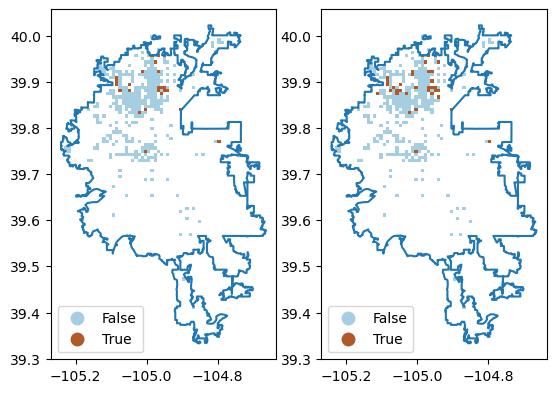

In [227]:
show_pixel_stats(sc_pixel_stats)

In [228]:
def show_pixel_percents(pixel_stats):
    fig, ax_arr = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=True, figsize=(10,5))
    pixel_stats.dropna().groupby("e_bike_better").count().id.plot(kind="pie", ax=ax_arr[0], autopct='%.1f', title="e-bikes are used more often than driving")
    pixel_stats.dropna().groupby("e_bike_gt_50_pct").count().id.plot(kind="pie", ax=ax_arr[1], autopct='%.1f', title="e-bike trips are least 50% of driving trips")
    ax_arr[0].set_ylabel("% of pixels")

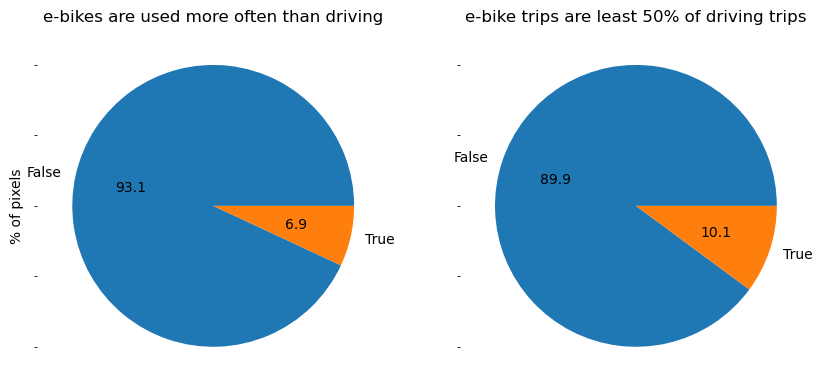

In [229]:
show_pixel_percents(sc_pixel_stats)

In [230]:
prepilot_pixel_stats = get_pixel_stats(prepilot_trips_split)

ValueError: aspect must be finite and positive 

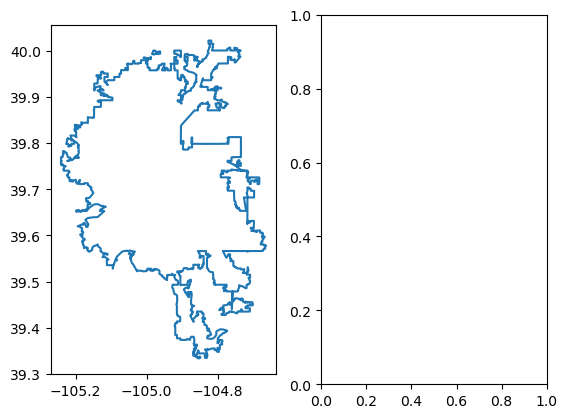

In [231]:
show_pixel_stats(prepilot_pixel_stats)

In [232]:
show_pixel_percents(prepilot_pixel_stats)

/root/miniconda-23.5.2/envs/emission/lib/python3.9/site-packages/matplotlib/axes/_axes.py:3201: RuntimeWarning: invalid value encountered in divide
  x = x / sx
/root/miniconda-23.5.2/envs/emission/lib/python3.9/site-packages/matplotlib/axes/_axes.py:3201: RuntimeWarning: invalid value encountered in divide
  x = x / sx


ValueError: need at least one array to concatenate

<Figure size 1000x500 with 2 Axes>

In [233]:
other_programs_split = get_all_e_bike_car_like(trip_program_df.query('program != "sc" & program != "prepilot" & program != "stage"'))

/tmp/ipykernel_185/127870489.py:2: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  start_end_points = trip_df.start_loc.append(trip_df.end_loc)
/tmp/ipykernel_185/127870489.py:2: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  start_end_points = trip_df.start_loc.append(trip_df.end_loc)
/tmp/ipykernel_185/127870489.py:2: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  start_end_points = trip_df.start_loc.append(trip_df.end_loc)


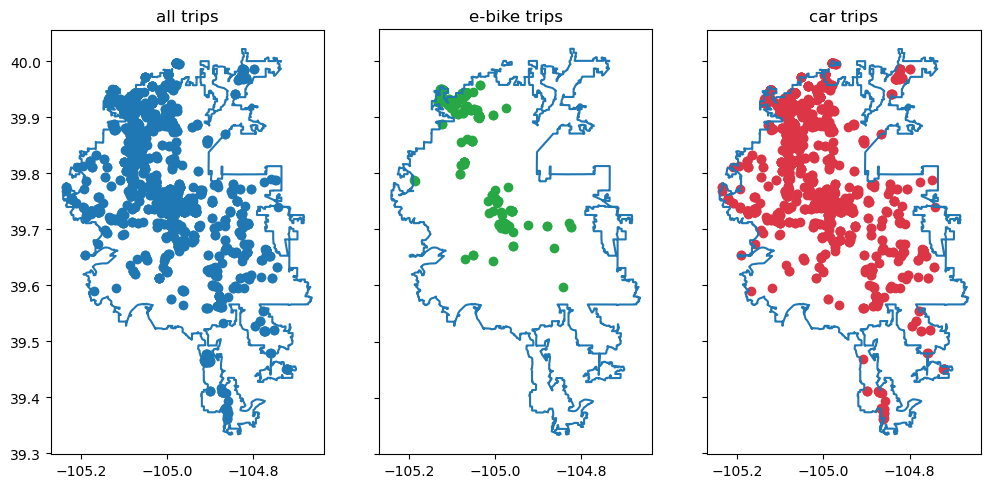

In [234]:
get_scatter_plots(other_programs_split)

In [235]:
other_programs_pixel_stats = get_pixel_stats(other_programs_split)

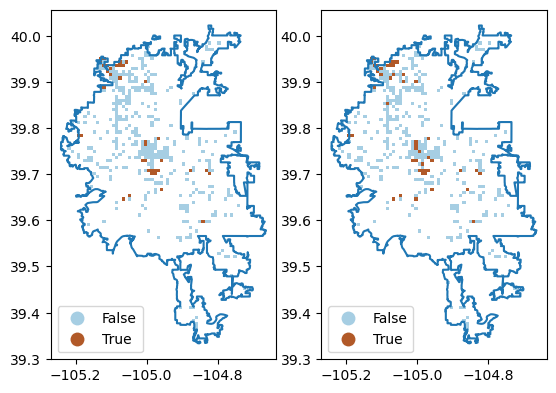

In [236]:
show_pixel_stats(other_programs_pixel_stats)

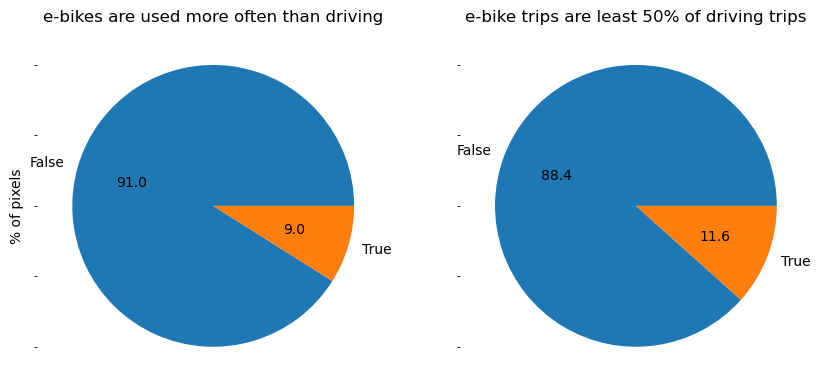

In [237]:
show_pixel_percents(other_programs_pixel_stats)

## Experimenting with whether we can associate other fields with the start_end_loc points

In [ ]:
start_loc_df = trip_program_df[["program", "mode_confirm", "start_loc"]].copy()
start_loc_df["type"] = ["start"] * len(start_loc_df)
start_loc_df.rename(columns = {"start_loc": "location"}, inplace=True)
start_loc_df.head()

In [ ]:
end_loc_df = trip_program_df[["program", "mode_confirm", "end_loc"]].copy()
end_loc_df["type"] = ["end"] * len(end_loc_df)
end_loc_df.rename(columns = {"end_loc": "location"}, inplace=True)
end_loc_df.head()

In [ ]:
loc_program_df = gpd.GeoDataFrame(start_loc_df.append(end_loc_df))
loc_program_geodf = loc_program_df.set_geometry(loc_program_df['location'].apply(lambda p: shp.geometry.Point(p['coordinates'])), crs="EPSG:4269")
loc_program_geodf.head()

In [ ]:
program_endpoints_within = loc_program_geodf[loc_program_geodf.within(denver_boundary.geometry.iloc[0])]

In [ ]:
program_endpoints_within.head()

In [ ]:
fig, ax_arr = plt.subplots(nrows=1, ncols=3, sharex=True, sharey=True, figsize=(12,6))
denver_boundary.boundary.plot(ax=ax_arr[0])
program_endpoints_within.plot(column="program", cmap="tab10", ax=ax_arr[0])
denver_boundary.boundary.plot(ax=ax_arr[1])
program_endpoints_within.query('mode_confirm == "pilot_ebike"').plot(column="program", cmap="tab10", ax=ax_arr[1])
denver_boundary.boundary.plot(ax=ax_arr[2])
program_endpoints_within.query('mode_confirm == "drove_alone" | mode_confirm == "shared_ride" | mode_confirm == "taxi"').plot(column="program", cmap="tab10", ax=ax_arr[2])

In [ ]:
other_programs_endpoints_within_query = program_endpoints_within.query('program != "sc" & program != "prepilot" & program != "stage"')

In [ ]:
fig, ax_arr = plt.subplots(nrows=1, ncols=5, sharex=True, sharey=True, figsize=(20,10))
denver_boundary.boundary.plot(ax=ax_arr[0])
other_programs_endpoints_within_query.plot(column="program", cmap="tab10", categories=other_programs_endpoints_within_query.program.unique(), ax=ax_arr[0], legend=True, legend_kwds={"loc": "lower left"})
ax_arr[0].set_title("all")
denver_boundary.boundary.plot(ax=ax_arr[1])
other_programs_endpoints_within_query.query('mode_confirm == "pilot_ebike"').plot(column="program", cmap="tab10", categories=other_programs_endpoints_within_query.program.unique(), ax=ax_arr[1], legend=True, legend_kwds={"loc": "lower left"})
ax_arr[1].set_title("e-bike")
denver_boundary.boundary.plot(ax=ax_arr[2])
other_programs_endpoints_within_query.query('mode_confirm == "drove_alone"').plot(column="program", cmap="tab10", categories=other_programs_endpoints_within_query.program.unique(), ax=ax_arr[2], legend=True, legend_kwds={"loc": "lower left"})
ax_arr[2].set_title("drove_alone")
denver_boundary.boundary.plot(ax=ax_arr[3])
other_programs_endpoints_within_query.query('mode_confirm == "shared_ride"').plot(column="program", cmap="tab10", categories=other_programs_endpoints_within_query.program.unique(), ax=ax_arr[3], legend=True, legend_kwds={"loc": "lower left"})
ax_arr[3].set_title("shared_ride")
denver_boundary.boundary.plot(ax=ax_arr[4])
other_programs_endpoints_within_query.query('mode_confirm == "taxi"').plot(column="program", cmap="tab10", categories=other_programs_endpoints_within_query.program.unique(), ax=ax_arr[4], legend=True, legend_kwds={"loc": "lower left"})
ax_arr[4].set_title("taxi")
# ax_arr[0].legend(["denver"] + other_programs_endpoints_within_query.program.unique().tolist(), loc="lower left", bbox_to_anchor=(0.5, 0.5))

In [ ]:
program_endpoints_within.to_file("ceo_results/program_endpoints_within_denver")

In [ ]:
program_endpoints_within.to_csv("ceo_results/program_endpoints_within_denver.csv")

In [ ]:
sc_pixel_stats_to_export = sc_pixel_stats.copy()

In [ ]:
sc_pixel_stats_to_export = sc_pixel_stats_to_export.astype({"e_bike_better": bool, "e_bike_gt_50_pct": bool})

In [ ]:
sc_pixel_stats_to_export.to_file("ceo_results/sc_pixel_stats")

In [ ]:
prepilot_pixel_stats_to_export = prepilot_pixel_stats.copy()

In [ ]:
prepilot_pixel_stats_to_export = prepilot_pixel_stats_to_export.astype({"e_bike_better": bool, "e_bike_gt_50_pct": bool})

In [ ]:
prepilot_pixel_stats_to_export.to_file("ceo_results/prepilot_pixel_stats")

In [ ]:
sc_pixel_stats.to_csv("ceo_results/sc_pixel_stats.csv")

In [ ]:
prepilot_pixel_stats.to_csv("ceo_results/prepilot_pixel_stats.csv")

In [ ]:
other_programs_pixel_stats_to_export = other_programs_pixel_stats.copy()

In [ ]:
other_programs_pixel_stats_to_export = other_programs_pixel_stats_to_export.astype({"e_bike_better": bool, "e_bike_gt_50_pct": bool})

In [ ]:
other_programs_pixel_stats_to_export.to_file("ceo_results/other_programs_pixel_stats")

In [ ]:
other_programs_pixel_stats.to_csv("ceo_results/other_programs_pixel_stats.csv")

# Cemal analysis

<Axes: >

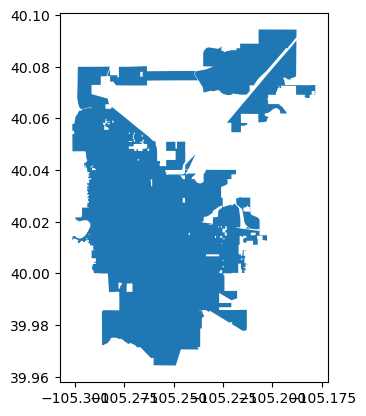

In [239]:
boulder_boundary = gpd.read_file(r"muni_boundaries/boulder.shp")
boulder_boundary.plot()

<Axes: >

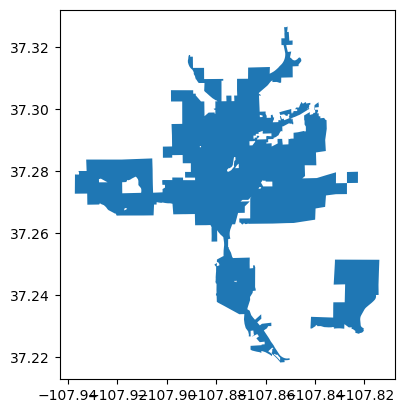

In [240]:
durango_boundary = gpd.read_file(r"muni_boundaries/durango.shp")
durango_boundary.plot()

<Axes: >

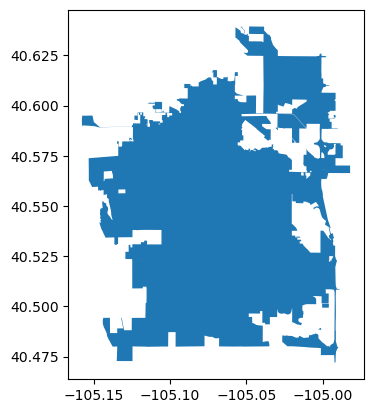

In [241]:
fort_collins_boundary = gpd.read_file(r"muni_boundaries/fort_collins.shp")
fort_collins_boundary.plot()

<Axes: >

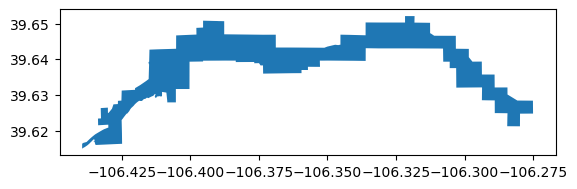

In [242]:
vail_boundary = gpd.read_file(r"muni_boundaries/vail.shp")
vail_boundary.plot()

<Axes: >

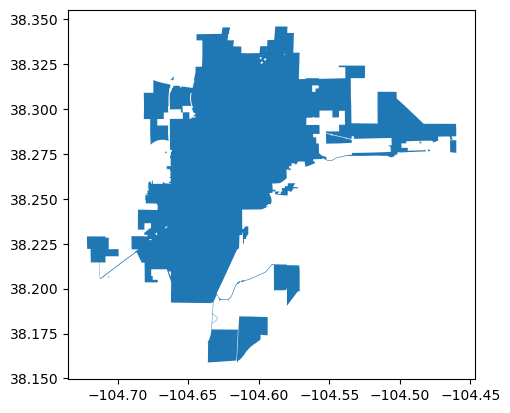

In [243]:
pueblo_boundary = gpd.read_file(r"muni_boundaries/pueblo.shp")
pueblo_boundary.plot()

<Axes: >

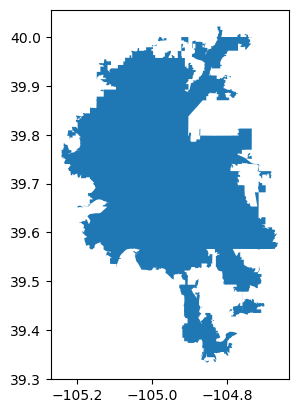

In [325]:
denver_boundary = gpd.read_file("muni_boundaries/denver_uza_akcicek.shp")
denver_boundary.plot()

In [346]:
all_smart_commute = trip_program_df_gdf[trip_program_df_gdf.program == 'sc']
all_sc_denver = all_smart_commute[trip_program_df_gdf.within(denver_boundary.geometry.iloc[0])]
all_sc_denver

/root/miniconda-23.5.2/envs/emission/lib/python3.9/site-packages/geopandas/geodataframe.py:1415: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result = super().__getitem__(key)


Unnamed: 0                       source      end_ts  \
50667       67743  DwellSegmentationTimeFilter  1625946868   
50668       67744  DwellSegmentationTimeFilter  1625950159   
50669       67745  DwellSegmentationTimeFilter  1625952426   
50670       67746  DwellSegmentationTimeFilter  1625954020   
50671       67747  DwellSegmentationTimeFilter  1625955259   
...           ...                          ...         ...   
57175       76100  DwellSegmentationDistFilter  1671568079   
57176       76101  DwellSegmentationDistFilter  1671588262   
57177       76102  DwellSegmentationDistFilter  1672006159   
57178       76103  DwellSegmentationDistFilter  1672008768   
57181       76106  DwellSegmentationDistFilter  1672095010   

                           end_fmt_time  \
50667         2021-07-10T13:54:28-06:00   
50668  2021-07-10T14:49:18.727000-06:00   
50669         2021-07-10T15:27:06-06:00   
50670         2021-07-10T15:53:40-06:00   
50671         2021-07-10T16:14:19-06:00   
...                                 ...   
57175  2022-12-20T13:27:58.999955-07:00   
57176  2022-12-20T19:04:21.998995-07:00   
57177  2022-12-25T15:09:18.999126-07:00   
57178  2022-12-25T15:52:47.999208-07:00   
57181  2022-12-26T15:50:10.000122-07:00   

                                              end_loc  \
50667                 POINT (-104.9728792 39.7440151)   
50668                  POINT (-104.9830358 39.889626)   
50669                 POINT (-104.9698159 39.8810238)   
50670                 POINT (-104.9787011 39.8846098)   
50671                 POINT (-104.9828896 39.8896154)   
...                                               ...   
57175   POINT (-104.98229116211178 39.89493632692852)   
57176   POINT (-104.98228496789756 39.89498964407935)   
57177  POINT (-104.98515943945296 39.888862997183445)   
57178  POINT (-104.98230606308373 39.894953862630786)   
57181  POINT (-104.98225984205764 39.895004545742246)   

                       raw_trip                   start_ts  \
50667  60ea047e7ac869992333ce4e  2021-07-10 19:30:33+00:00   
50668  60ea128cd57223e5e640cb24  2021-07-10 20:24:49+00:00   
50669  60ea209bce55ed5cb2d30585  2021-07-10 21:04:35+00:00   
50670  60ea209bce55ed5cb2d30589  2021-07-10 21:38:45+00:00   
50671  60ea2eaa2e54468f9b2159f2  2021-07-10 22:06:49+00:00   
...                         ...                        ...   
57175  63a21d2ed71e4cdc10e01ec2  2022-12-20 20:16:41+00:00   
57176  63a271b57029d086d8c32fa9  2022-12-21 01:39:44+00:00   
57177  63a8d104efbef464e677de90  2022-12-25 21:42:11+00:00   
57178  63a8ded3598cf9fb2b30a3a3  2022-12-25 22:41:15+00:00   
57181  63aa304cfea9f9651074d24c  2022-12-26 22:31:52+00:00   

                         start_fmt_time  \
50667  2021-07-10T13:30:32.631094-06:00   
50668  2021-07-10T14:24:48.984328-06:00   
50669  2021-07-10T15:04:34.969272-06:00   
50670  2021-07-10T15:38:45.196925-06:00   
50671  2021-07-10T16:06:49.491964-06:00   
...                                 ...   
57175  2022-12-20T13:16:40.843253-07:00   
57176  2022-12-20T18:39:43.816695-07:00   
57177  2022-12-25T14:42:10.602410-07:00   
57178  2022-12-25T15:41:15.272064-07:00   
57181  2022-12-26T15:31:52.085836-07:00   

                                            start_loc   duration  ...  \
50667                 POINT (-104.9827777 39.8895585)  23.922815  ...   
50668                 POINT (-104.9728792 39.7440151)  24.495711  ...   
50669                  POINT (-104.9830358 39.889626)  22.517179  ...   
50670                 POINT (-104.9698159 39.8810238)  14.913385  ...   
50671                 POINT (-104.9787011 39.8846098)   7.491801  ...   
...                                               ...        ...  ...   
57175   POINT (-104.97575955884808 39.91624540224313)  11.302612  ...   
57176   POINT (-104.98229116211178 39.89493632692852)  24.636372  ...   
57177   POINT (-104.98228496789756 39.89498964407935)  27.139945  ...   
57178  POINT (-104.98515943945296 39.888862997183445)  11.545452  ..

In [244]:
all_within_boulder = trip_program_df_gdf[trip_program_df_gdf.within(boulder_boundary.geometry.iloc[0])]
all_within_durango = trip_program_df_gdf[trip_program_df_gdf.within(durango_boundary.geometry.iloc[0])]
all_within_fortcollins = trip_program_df_gdf[trip_program_df_gdf.within(fort_collins_boundary.geometry.iloc[0])]
all_within_vail = trip_program_df_gdf[trip_program_df_gdf.within(vail_boundary.geometry.iloc[0])]
all_within_pueblo = trip_program_df_gdf[trip_program_df_gdf.within(pueblo_boundary.geometry.iloc[0])]

In [327]:
car_like_trips.program

59         4c
183        4c
185        4c
196        4c
197        4c
         ... 
61391    vail
61414    vail
61415    vail
61421    vail
61425    vail
Name: program, Length: 30767, dtype: object

In [376]:
car_like_trips

Unnamed: 0                       source      end_ts  \
59           6056  DwellSegmentationTimeFilter  1631232028   
183          6181  DwellSegmentationTimeFilter  1633811156   
185          6183  DwellSegmentationTimeFilter  1633815365   
196          6398  DwellSegmentationTimeFilter  1629863928   
197          6399  DwellSegmentationTimeFilter  1629866190   
...           ...                          ...         ...   
61391       81221  DwellSegmentationDistFilter  1665275519   
61414       81245  DwellSegmentationDistFilter  1665774763   
61415       81246  DwellSegmentationDistFilter  1665777404   
61421       81254  DwellSegmentationDistFilter  1666103223   
61425       81258  DwellSegmentationDistFilter  1666119312   

                           end_fmt_time  \
59     2021-09-09T18:00:28.126000-06:00   
183    2021-10-09T14:25:56.373000-06:00   
185    2021-10-09T15:36:05.291000-06:00   
196    2021-08-24T21:58:47.819000-06:00   
197    2021-08-24T22:36:30.145000-06:00   
...                                 ...   
61391  2022-10-08T18:31:58.999455-06:00   
61414  2022-10-14T13:12:43.000239-06:00   
61415  2022-10-14T13:56:43.999425-06:00   
61421  2022-10-18T08:27:02.999717-06:00   
61425  2022-10-18T12:55:12.486333-06:00   

                                              end_loc  \
59                    POINT (-107.8611465 37.2751432)   
183                   POINT (-107.8649282 37.2301154)   
185                   POINT (-107.8700134 37.2681743)   
196                   POINT (-107.8662414 37.2307157)   
197                    POINT (-107.8772764 37.285273)   
...                                               ...   
61391   POINT (-106.4212499302017 39.626508282973084)   
61414  POINT (-104.70923001877942 38.831842036317646)   
61415   POINT (-104.70634567587071 38.82757701283735)   
61421   POINT (-104.84291857161664 39.59891065553805)   
61425  POINT (-104.67260671157864 39.849455201252944)   

                       raw_trip                   start_ts  \
59     613ab1b2c169dd88cceffeef  2021-09-09 23:32:06+00:00   
183    616214901004b01e83c6afde  2021-10-09 20:15:19+00:00   
185    616214911004b01e83c6afe2  2021-10-09 21:19:49+00:00   
196    6125d1e9daa12484eeddc6c8  2021-08-25 03:39:28+00:00   
197    6125dff93fd4def2fe4e6934  2021-08-25 04:25:45+00:00   
...                         ...                        ...   
61391  634217e9e806c82e98404c37  2022-10-08 23:31:21+00:00   
61414  6349ba6587ee58b2b1e6ba4f  2022-10-14 18:40:11+00:00   
61415  6349c86e53c68f13be56f7d5  2022-10-14 19:29:27+00:00   
61421  634ed61d3c4a55d8c5873d51  2022-10-18 13:21:14+00:00   
61425  634f0065602697736c79bf43  2022-10-18 18:12:57+00:00   

                         start_fmt_time  \
59     2021-09-09T17:32:05.662200-06:00   
183    2021-10-09T14:15:18.503759-06:00   
185    2021-10-09T15:19:49.409921-06:00   
196    2021-08-24T21:39:27.859195-06:00   
197    2021-08-24T22:25:45.049140-06:00   
...                                 ...   
61391  2022-10-08T17:31:20.670843-06:00   
61414  2022-10-14T12:40:11.132415-06:00   
61415  2022-10-14T13:29:26.757139-06:00   
61421  2022-10-18T07:21:13.804461-06:00   
61425  2022-10-18T12:12:57.443042-06:00   

                                            start_loc   duration  ...  \
59                    POINT (-107.8611611 37.2751547)  28.374397  ...   
183                   POINT (-107.8611546 37.2751565)  10.631154  ...   
185                   POINT (-107.8613672 37.2751519)  16.264685  ...   
196                    POINT (-107.8745735 37.250252)  19.332663  ...   
197                   POINT (-107.8662414 37.2307157)  10.751598  ...   
...                                               ...        ...  ...   
61391  POINT (-106.10021271380299 39.588477776670466)  60.638810  ...   
61414    POINT (-104.8235672098085 38.83523424106838)  32.531130  ...   
61415  POINT (-104.70923001877942 38.831842036317646)  27.287371  ...   
61421  POINT (-105.49755197154236 39.742105831111175)  65.819921  ..

In [375]:
#denver
car_like_start_or_end_within_denver = car_like_trips[(car_like_trips.within(denver_boundary.geometry.iloc[0])) & (car_like_trips.program == "sc")]
e_bike_start_or_end_within_denver = e_bike_trips[(e_bike_trips.within(denver_boundary.geometry.iloc[0])) & (e_bike_trips.program == "sc")]

#boulder
car_like_start_or_end_within_boulder = car_like_trips[car_like_trips.within(boulder_boundary.geometry.iloc[0])]
e_bike_start_or_end_within_boulder = e_bike_trips[e_bike_trips.within(boulder_boundary.geometry.iloc[0])]

#durango
car_like_start_or_end_within_durango = car_like_trips[car_like_trips.within(durango_boundary.geometry.iloc[0])]
e_bike_start_or_end_within_durango = e_bike_trips[e_bike_trips.within(durango_boundary.geometry.iloc[0])]

#fort collins
car_like_start_or_end_within_fortcollins = car_like_trips[car_like_trips.within(fort_collins_boundary.geometry.iloc[0])]
e_bike_start_or_end_within_fortcollins = e_bike_trips[e_bike_trips.within(fort_collins_boundary.geometry.iloc[0])]

#vail
car_like_start_or_end_within_vail = car_like_trips[car_like_trips.within(vail_boundary.geometry.iloc[0])]
e_bike_start_or_end_within_vail = e_bike_trips[e_bike_trips.within(vail_boundary.geometry.iloc[0])]

#pueblo
car_like_start_or_end_within_pueblo = car_like_trips[car_like_trips.within(pueblo_boundary.geometry.iloc[0])]
e_bike_start_or_end_within_pueblo = e_bike_trips[e_bike_trips.within(pueblo_boundary.geometry.iloc[0])]

In [320]:
# e_bike_denver_lessthan5=e_bike_start_or_end_within[e_bike_start_or_end_within['distance_miles']<=5]

In [55]:
e_bike_boulder_lessthan5=e_bike_start_or_end_within_boulder[e_bike_start_or_end_within_boulder['distance_miles']<=5]
e_bike_durango_lessthan5=e_bike_start_or_end_within_durango[e_bike_start_or_end_within_durango['distance_miles']<=5]
e_bike_fortcollins_lessthan5=e_bike_start_or_end_within_fortcollins[e_bike_start_or_end_within_fortcollins['distance_miles']<=5]
e_bike_vail_lessthan5=e_bike_start_or_end_within_vail[e_bike_start_or_end_within_vail['distance_miles']<=5]
e_bike_pueblo_lessthan5=e_bike_start_or_end_within_pueblo[e_bike_start_or_end_within_pueblo['distance_miles']<=5]

<Axes: >

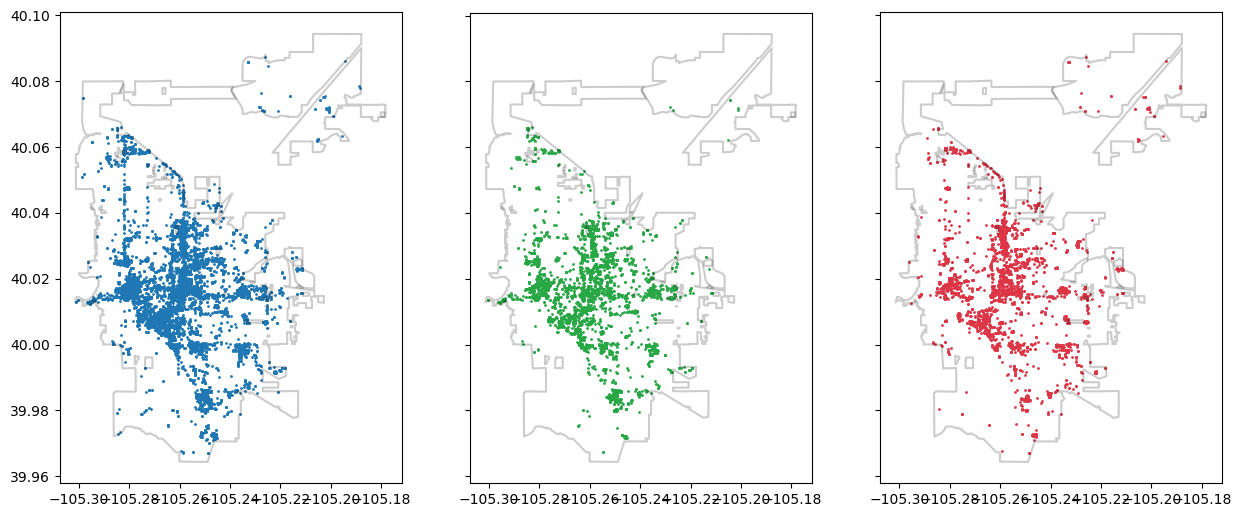

In [247]:
#boulder
fig, ax_arr = plt.subplots(nrows=1, ncols=3, figsize=(15,15), sharex=True, sharey=True)
boulder_boundary.boundary.plot(ax=ax_arr[0], alpha = 0.2, color = "black", edgecolor='black')
all_within_boulder.plot(ax=ax_arr[0], markersize=1)
boulder_boundary.boundary.plot(ax=ax_arr[1], alpha = 0.2, color = "black", edgecolor='black')
e_bike_start_or_end_within_boulder.plot(color="#28a745", ax=ax_arr[1], markersize=1)
boulder_boundary.boundary.plot(ax=ax_arr[2], alpha = 0.2, color = "black", edgecolor='black')
car_like_start_or_end_within_boulder.plot(color="#dc3545", ax=ax_arr[2], markersize=1)

<Axes: >

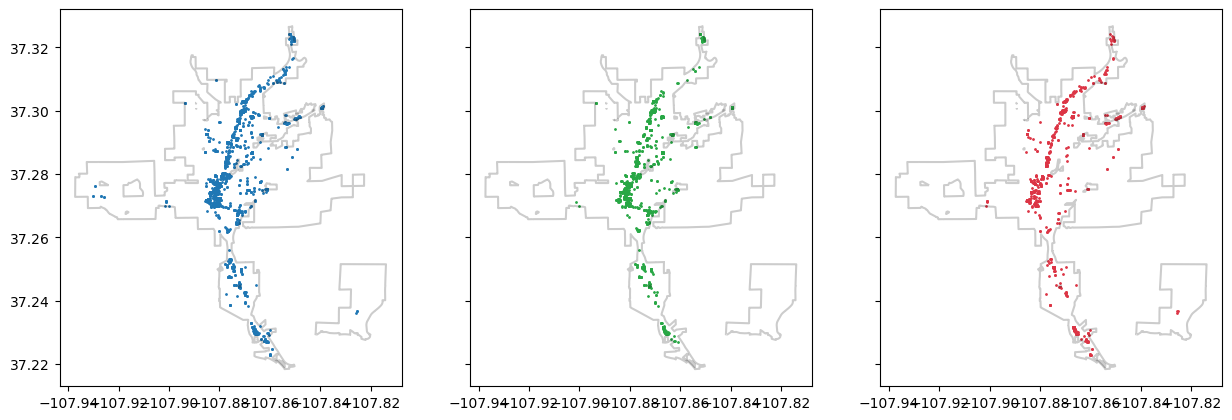

In [248]:
#durango
fig, ax_arr = plt.subplots(nrows=1, ncols=3, figsize=(15,15), sharex=True, sharey=True)
durango_boundary.boundary.plot(ax=ax_arr[0], alpha = 0.2, color = "black", edgecolor='black')
all_within_durango.plot(ax=ax_arr[0], markersize=1)
durango_boundary.boundary.plot(ax=ax_arr[1], alpha = 0.2, color = "black", edgecolor='black')
e_bike_start_or_end_within_durango.plot(color="#28a745", ax=ax_arr[1], markersize=1)
durango_boundary.boundary.plot(ax=ax_arr[2], alpha = 0.2, color = "black", edgecolor='black')
car_like_start_or_end_within_durango.plot(color="#dc3545", ax=ax_arr[2], markersize=1)

<Axes: >

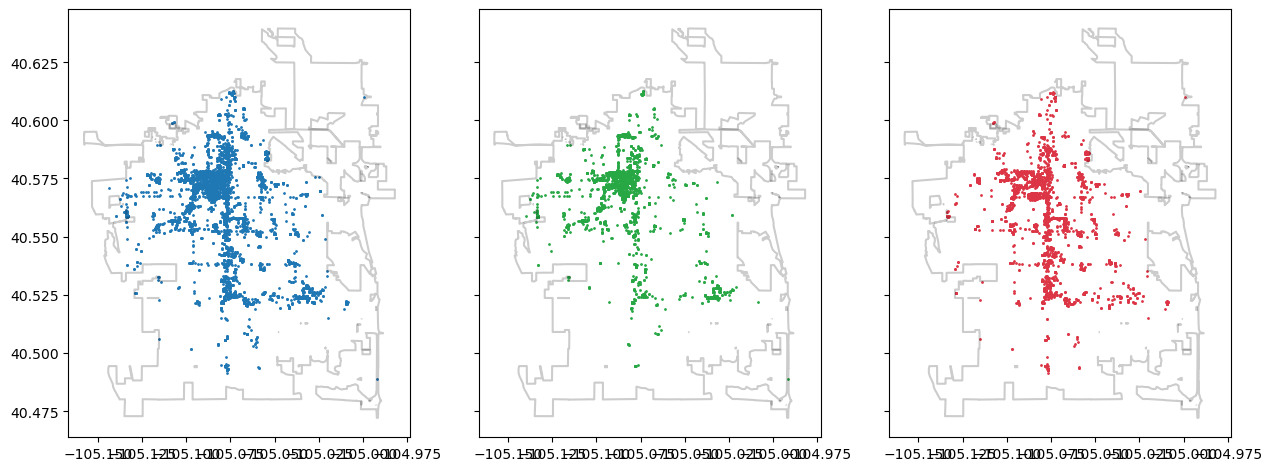

In [249]:
#fort collins
fig, ax_arr = plt.subplots(nrows=1, ncols=3, figsize=(15,15), sharex=True, sharey=True)
fort_collins_boundary.boundary.plot(ax=ax_arr[0], alpha = 0.2, color = "black", edgecolor='black')
all_within_fortcollins.plot(ax=ax_arr[0], markersize=1)
fort_collins_boundary.boundary.plot(ax=ax_arr[1], alpha = 0.2, color = "black", edgecolor='black')
e_bike_start_or_end_within_fortcollins.plot(color="#28a745", ax=ax_arr[1], markersize=1)
fort_collins_boundary.boundary.plot(ax=ax_arr[2], alpha = 0.2, color = "black", edgecolor='black')
car_like_start_or_end_within_fortcollins.plot(color="#dc3545", ax=ax_arr[2], markersize=1)

<Axes: >

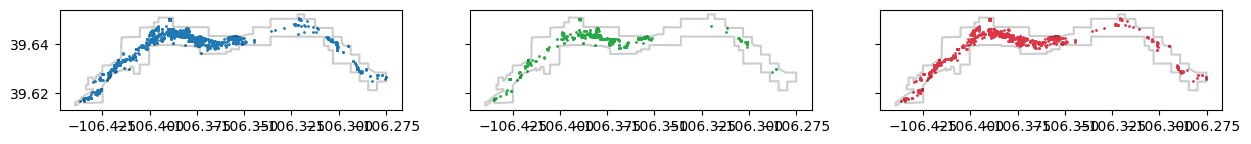

In [250]:
#vail
fig, ax_arr = plt.subplots(nrows=1, ncols=3, figsize=(15,15), sharex=True, sharey=True)
vail_boundary.boundary.plot(ax=ax_arr[0], alpha = 0.2, color = "black", edgecolor='black')
all_within_vail.plot(ax=ax_arr[0], markersize=1)
vail_boundary.boundary.plot(ax=ax_arr[1], alpha = 0.2, color = "black", edgecolor='black')
e_bike_start_or_end_within_vail.plot(color="#28a745", ax=ax_arr[1], markersize=1)
vail_boundary.boundary.plot(ax=ax_arr[2], alpha = 0.2, color = "black", edgecolor='black')
car_like_start_or_end_within_vail.plot(color="#dc3545", ax=ax_arr[2], markersize=1)

<Axes: >

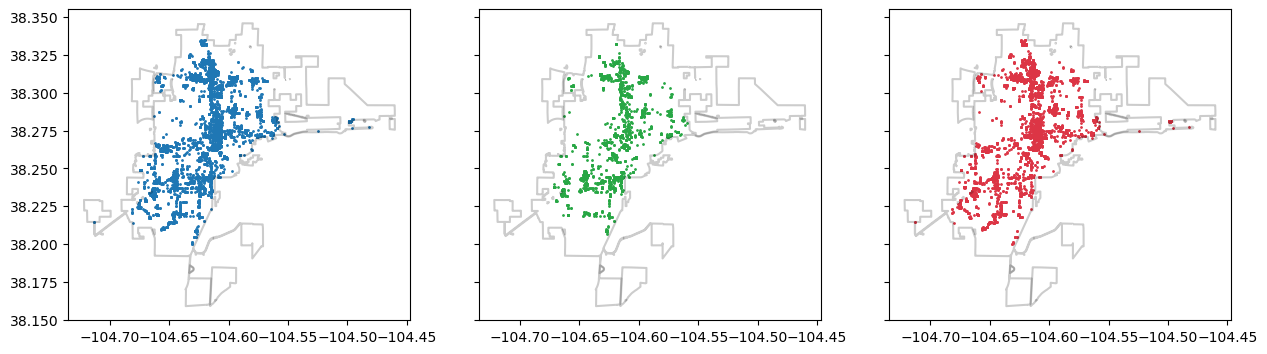

In [251]:
#pueblo
fig, ax_arr = plt.subplots(nrows=1, ncols=3, figsize=(15,15), sharex=True, sharey=True)
pueblo_boundary.boundary.plot(ax=ax_arr[0], alpha = 0.2, color = "black", edgecolor='black')
all_within_pueblo.plot(ax=ax_arr[0], markersize=1)
pueblo_boundary.boundary.plot(ax=ax_arr[1], alpha = 0.2, color = "black", edgecolor='black')
e_bike_start_or_end_within_pueblo.plot(color="#28a745", ax=ax_arr[1], markersize=1)
pueblo_boundary.boundary.plot(ax=ax_arr[2], alpha = 0.2, color = "black", edgecolor='black')
car_like_start_or_end_within_pueblo.plot(color="#dc3545", ax=ax_arr[2], markersize=1)

<Axes: >

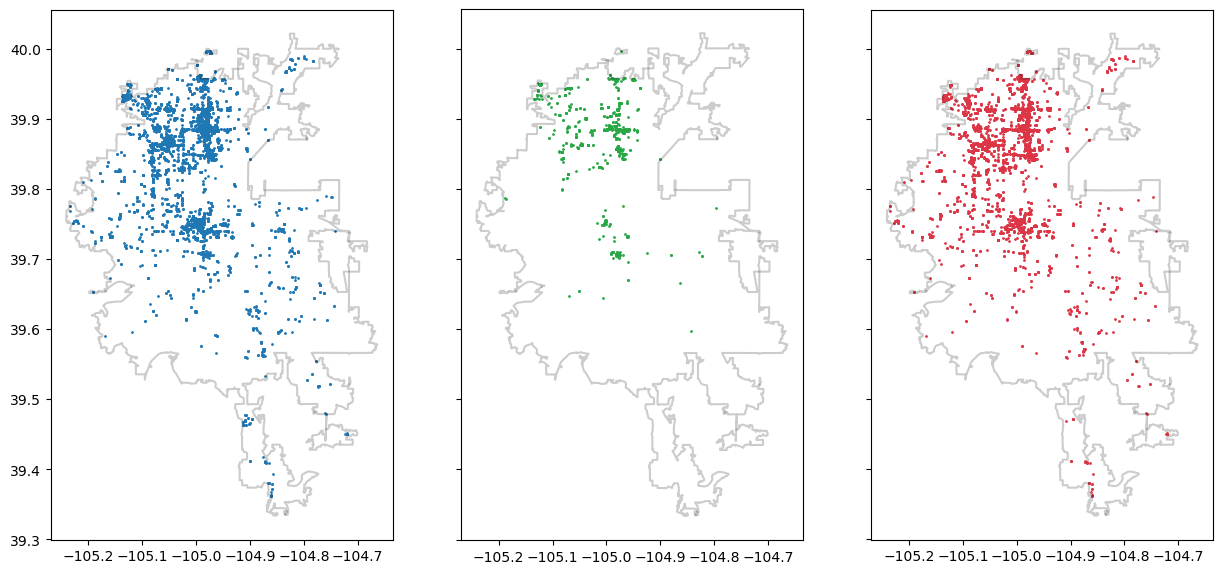

In [252]:
fig, ax_arr = plt.subplots(nrows=1, ncols=3, figsize=(15,15), sharex=True, sharey=True)
denver_boundary.boundary.plot(ax=ax_arr[0], alpha = 0.2, color = "black", edgecolor='black')
all_start_or_end_within.plot(ax=ax_arr[0], markersize=1)
denver_boundary.boundary.plot(ax=ax_arr[1], alpha = 0.2, color = "black", edgecolor='black')
e_bike_start_or_end_within.plot(color="#28a745", ax=ax_arr[1], markersize=1)
denver_boundary.boundary.plot(ax=ax_arr[2], alpha = 0.2, color = "black", edgecolor='black')
car_like_start_or_end_within.plot(color="#dc3545", ax=ax_arr[2], markersize=1)

# blocks analysis

In [350]:
denver_blocks = gpd.read_file(r"muni_boundaries/denver_blocks.shp")
boulder_blocks= gpd.read_file(r"muni_boundaries/boulder_blocks.shp")
fort_collins_blocks = gpd.read_file(r"muni_boundaries/fort_collins_blocks.shp")
vail_blocks = gpd.read_file(r"muni_boundaries/vail_blocks.shp")
durango_blocks = gpd.read_file(r"muni_boundaries/durango_blocks.shp")
pueblo_blocks = gpd.read_file(r"muni_boundaries/pueblo_blocks.shp")

In [351]:
denver_pixels = gpd.read_file(r"muni_boundaries/denver_pixels_ca.shp")
boulder_pixels= gpd.read_file(r"muni_boundaries/boulder_pixels.shp")
fort_collins_pixels = gpd.read_file(r"muni_boundaries/fortcollins_pixels.shp")
vail_pixels= gpd.read_file(r"muni_boundaries/vail_pixels.shp")
durango_pixels = gpd.read_file(r"muni_boundaries/durango_pixels.shp")
pueblo_pixels = gpd.read_file(r"muni_boundaries/pueblo_pixels.shp")

In [352]:
#denver First, let's just make a dataframe with the three different counts: total, e-bike, car-like, for each polygon
def get_counts(pixel_polygon):
    all_trip_count = np.count_nonzero(all_sc_denver.within(pixel_polygon))
    e_bike_trip_count = np.count_nonzero(e_bike_start_or_end_within_denver.within(pixel_polygon))
    car_like_trip_count = np.count_nonzero(car_like_start_or_end_within_denver.within(pixel_polygon))
    return pd.Series([all_trip_count, e_bike_trip_count, car_like_trip_count])

In [353]:
# boulder First, let's just make a dataframe with the three different counts: total, e-bike, car-like, for each polygon
def get_counts_boulder(pixel_polygon):
    all_trip_count = np.count_nonzero(all_within_boulder.within(pixel_polygon))
    e_bike_trip_count = np.count_nonzero(e_bike_start_or_end_within_boulder.within(pixel_polygon))
    car_like_trip_count = np.count_nonzero(car_like_start_or_end_within_boulder.within(pixel_polygon))
    return pd.Series([all_trip_count, e_bike_trip_count, car_like_trip_count])

# fort collins First, let's just make a dataframe with the three different counts: total, e-bike, car-like, for each polygon
def get_counts_fortcollins(pixel_polygon):
    all_trip_count = np.count_nonzero(all_within_fortcollins.within(pixel_polygon))
    e_bike_trip_count = np.count_nonzero(e_bike_start_or_end_within_fortcollins.within(pixel_polygon))
    car_like_trip_count = np.count_nonzero(car_like_start_or_end_within_fortcollins.within(pixel_polygon))
    return pd.Series([all_trip_count, e_bike_trip_count, car_like_trip_count])

# vail First, let's just make a dataframe with the three different counts: total, e-bike, car-like, for each polygon
def get_counts_vail(pixel_polygon):
    all_trip_count = np.count_nonzero(all_within_vail.within(pixel_polygon))
    e_bike_trip_count = np.count_nonzero(e_bike_start_or_end_within_vail.within(pixel_polygon))
    car_like_trip_count = np.count_nonzero(car_like_start_or_end_within_vail.within(pixel_polygon))
    return pd.Series([all_trip_count, e_bike_trip_count, car_like_trip_count])

# Durango First, let's just make a dataframe with the three different counts: total, e-bike, car-like, for each polygon
def get_counts_durango(pixel_polygon):
    all_trip_count = np.count_nonzero(all_within_durango.within(pixel_polygon))
    e_bike_trip_count = np.count_nonzero(e_bike_start_or_end_within_durango.within(pixel_polygon))
    car_like_trip_count = np.count_nonzero(car_like_start_or_end_within_durango.within(pixel_polygon))
    return pd.Series([all_trip_count, e_bike_trip_count, car_like_trip_count])

# pueblo First, let's just make a dataframe with the three different counts: total, e-bike, car-like, for each polygon
def get_counts_pueblo(pixel_polygon):
    all_trip_count = np.count_nonzero(all_within_pueblo.within(pixel_polygon))
    e_bike_trip_count = np.count_nonzero(e_bike_start_or_end_within_pueblo.within(pixel_polygon))
    car_like_trip_count = np.count_nonzero(car_like_start_or_end_within_pueblo.within(pixel_polygon))
    return pd.Series([all_trip_count, e_bike_trip_count, car_like_trip_count])

In [354]:
denver_blocks[["all_trip_count", "e_bike_trip_count", "car_like_trip_count"]] = denver_blocks.geometry.apply(lambda pp: get_counts(pp))
boulder_blocks[["all_trip_count", "e_bike_trip_count", "car_like_trip_count"]] = boulder_blocks.geometry.apply(lambda pp: get_counts_boulder(pp))
fort_collins_blocks[["all_trip_count", "e_bike_trip_count", "car_like_trip_count"]] = fort_collins_blocks.geometry.apply(lambda pp: get_counts_fortcollins(pp))
vail_blocks[["all_trip_count", "e_bike_trip_count", "car_like_trip_count"]] = vail_blocks.geometry.apply(lambda pp: get_counts_vail(pp))
durango_blocks[["all_trip_count", "e_bike_trip_count", "car_like_trip_count"]] = durango_blocks.geometry.apply(lambda pp: get_counts_durango(pp))
pueblo_blocks[["all_trip_count", "e_bike_trip_count", "car_like_trip_count"]] = pueblo_blocks.geometry.apply(lambda pp: get_counts_pueblo(pp))

In [355]:
denver_pixels[["all_trip_count", "e_bike_trip_count", "car_like_trip_count"]] = denver_pixels.geometry.apply(lambda pp: get_counts(pp))
boulder_pixels[["all_trip_count", "e_bike_trip_count", "car_like_trip_count"]] = boulder_pixels.geometry.apply(lambda pp: get_counts_boulder(pp))
fort_collins_pixels[["all_trip_count", "e_bike_trip_count", "car_like_trip_count"]] = fort_collins_pixels.geometry.apply(lambda pp: get_counts_fortcollins(pp))
vail_pixels[["all_trip_count", "e_bike_trip_count", "car_like_trip_count"]] = vail_pixels.geometry.apply(lambda pp: get_counts_vail(pp))
durango_pixels[["all_trip_count", "e_bike_trip_count", "car_like_trip_count"]] = durango_pixels.geometry.apply(lambda pp: get_counts_durango(pp))
pueblo_pixels[["all_trip_count", "e_bike_trip_count", "car_like_trip_count"]] = pueblo_pixels.geometry.apply(lambda pp: get_counts_pueblo(pp))

In [356]:
denver_blocks["e_bike_2_car_like"] = denver_blocks.e_bike_trip_count / denver_blocks.car_like_trip_count
boulder_blocks["e_bike_2_car_like"] = boulder_blocks.e_bike_trip_count / boulder_blocks.car_like_trip_count
fort_collins_blocks["e_bike_2_car_like"] = fort_collins_blocks.e_bike_trip_count / fort_collins_blocks.car_like_trip_count
vail_blocks["e_bike_2_car_like"] = vail_blocks.e_bike_trip_count / vail_blocks.car_like_trip_count
durango_blocks["e_bike_2_car_like"] = durango_blocks.e_bike_trip_count / durango_blocks.car_like_trip_count
pueblo_blocks["e_bike_2_car_like"] = pueblo_blocks.e_bike_trip_count / pueblo_blocks.car_like_trip_count

In [357]:
denver_pixels["e_bike_2_car_like"] = denver_pixels.e_bike_trip_count / denver_pixels.car_like_trip_count
boulder_pixels["e_bike_2_car_like"] = boulder_pixels.e_bike_trip_count / boulder_pixels.car_like_trip_count
fort_collins_pixels["e_bike_2_car_like"] = fort_collins_pixels.e_bike_trip_count / fort_collins_pixels.car_like_trip_count
vail_pixels["e_bike_2_car_like"] = vail_pixels.e_bike_trip_count / vail_pixels.car_like_trip_count
durango_pixels["e_bike_2_car_like"] = durango_pixels.e_bike_trip_count / durango_pixels.car_like_trip_count
pueblo_pixels["e_bike_2_car_like"] = pueblo_pixels.e_bike_trip_count / pueblo_pixels.car_like_trip_count

In [358]:
denver_blocks.replace(np.inf, denver_blocks.replace(np.inf, 0).e_bike_2_car_like.max(), inplace=True)
boulder_blocks.replace(np.inf, boulder_blocks.replace(np.inf, 0).e_bike_2_car_like.max(), inplace=True)
fort_collins_blocks.replace(np.inf, fort_collins_blocks.replace(np.inf, 0).e_bike_2_car_like.max(), inplace=True)
vail_blocks.replace(np.inf, vail_blocks.replace(np.inf, 0).e_bike_2_car_like.max(), inplace=True)
durango_blocks.replace(np.inf, durango_blocks.replace(np.inf, 0).e_bike_2_car_like.max(), inplace=True)
pueblo_blocks.replace(np.inf, pueblo_blocks.replace(np.inf, 0).e_bike_2_car_like.max(), inplace=True)

In [359]:
denver_pixels.replace(np.inf, denver_pixels.replace(np.inf, 0).e_bike_2_car_like.max(), inplace=True)
boulder_pixels.replace(np.inf, boulder_pixels.replace(np.inf, 0).e_bike_2_car_like.max(), inplace=True)
fort_collins_pixels.replace(np.inf, fort_collins_pixels.replace(np.inf, 0).e_bike_2_car_like.max(), inplace=True)
vail_pixels.replace(np.inf, vail_pixels.replace(np.inf, 0).e_bike_2_car_like.max(), inplace=True)
durango_pixels.replace(np.inf, durango_pixels.replace(np.inf, 0).e_bike_2_car_like.max(), inplace=True)
pueblo_pixels.replace(np.inf, pueblo_pixels.replace(np.inf, 0).e_bike_2_car_like.max(), inplace=True)

In [360]:
denver_blocks["e_bike_better"] = pd.Categorical(denver_blocks.e_bike_2_car_like >= 1)
boulder_blocks["e_bike_better"] = pd.Categorical(boulder_blocks.e_bike_2_car_like >= 1)
fort_collins_blocks["e_bike_better"] = pd.Categorical(fort_collins_blocks.e_bike_2_car_like >= 1)
vail_blocks["e_bike_better"] = pd.Categorical(vail_blocks.e_bike_2_car_like >= 1)
durango_blocks["e_bike_better"] = pd.Categorical(durango_blocks.e_bike_2_car_like >= 1)
pueblo_blocks["e_bike_better"] = pd.Categorical(pueblo_blocks.e_bike_2_car_like >= 1)

In [361]:
denver_pixels["e_bike_better"] = pd.Categorical(denver_pixels.e_bike_2_car_like >= 1)
boulder_pixels["e_bike_better"] = pd.Categorical(boulder_pixels.e_bike_2_car_like >= 1)
fort_collins_pixels["e_bike_better"] = pd.Categorical(fort_collins_pixels.e_bike_2_car_like >= 1)
vail_pixels["e_bike_better"] = pd.Categorical(vail_pixels.e_bike_2_car_like >= 1)
durango_pixels["e_bike_better"] = pd.Categorical(durango_pixels.e_bike_2_car_like >= 1)
pueblo_pixels["e_bike_better"] = pd.Categorical(pueblo_pixels.e_bike_2_car_like >= 1)

In [362]:
denver_blocks_2 = denver_blocks[denver_blocks['e_bike_2_car_like'].notna()]
boulder_blocks_2 = boulder_blocks[boulder_blocks['e_bike_2_car_like'].notna()]
fort_collins_blocks_2 = fort_collins_blocks[fort_collins_blocks['e_bike_2_car_like'].notna()]
vail_blocks_2 = vail_blocks[vail_blocks['e_bike_2_car_like'].notna()]
durango_blocks_2 = durango_blocks[durango_blocks['e_bike_2_car_like'].notna()]
pueblo_blocks_2 = pueblo_blocks[pueblo_blocks['e_bike_2_car_like'].notna()]

In [363]:
denver_pixels_2 = denver_pixels[denver_pixels['e_bike_2_car_like'].notna()]
boulder_pixels_2 = boulder_pixels[boulder_pixels['e_bike_2_car_like'].notna()]
fort_collins_pixels_2 = fort_collins_pixels[fort_collins_pixels['e_bike_2_car_like'].notna()]
vail_pixels_2 = vail_pixels[vail_pixels['e_bike_2_car_like'].notna()]
durango_pixels_2 = durango_pixels[durango_pixels['e_bike_2_car_like'].notna()]
pueblo_pixels_2 = pueblo_pixels[pueblo_pixels['e_bike_2_car_like'].notna()]

In [364]:
denver_pixels_2

id          left           top         right        bottom  \
3     2720.0 -1.168837e+07  4.850141e+06 -1.168737e+07  4.849141e+06   
9     2726.0 -1.168837e+07  4.844141e+06 -1.168737e+07  4.843141e+06   
22    2739.0 -1.168837e+07  4.831141e+06 -1.168737e+07  4.830141e+06   
23    2740.0 -1.168837e+07  4.830141e+06 -1.168737e+07  4.829141e+06   
27    2712.0 -1.168837e+07  4.858141e+06 -1.168737e+07  4.857141e+06   
...      ...           ...           ...           ...           ...   
3219  3123.0 -1.168437e+07  4.847141e+06 -1.168337e+07  4.846141e+06   
3395  3341.0 -1.168237e+07  4.829141e+06 -1.168137e+07  4.828141e+06   
3422  2810.0 -1.168737e+07  4.860141e+06 -1.168637e+07  4.859141e+06   
3423  2811.0 -1.168737e+07  4.859141e+06 -1.168637e+07  4.858141e+06   
3424  2812.0 -1.168737e+07  4.858141e+06 -1.168637e+07  4.857141e+06   

                                               geometry  all_trip_count  \
3     POLYGON ((-104.99843 39.89118, -104.98945 39.8...              17   
9     POLYGON ((-104.99843 39.84981, -104.98945 39.8...               1   
22    POLYGON ((-104.99843 39.76010, -104.98945 39.7...               1   
23    POLYGON ((-104.99843 39.75319, -104.98945 39.7...               2   
27    POLYGON ((-104.99843 39.94629, -104.98945 39.9...               2   
...                                                 ...             ...   
3219  POLYGON ((-104.96250 39.87050, -104.95352 39.8...              32   
3395  POLYGON ((-104.94454 39.74628, -104.93555 39.7...               1   
3422  POLYGON ((-104.98945 39.96007, -104.98047 39.9...               2   
3423  POLYGON ((-104.98945 39.95318, -104.98047 39.9...               3   
3424  POLYGON ((-104.98945 39.94629, -104.98047 39.9...              12   

      e_bike_trip_count  car_like_trip_count  e_bike_2_car_like e_bike_better  
3                    11                    3           3.666667          True  
9                     0                    1           0.000000         False  
22                    0                    1           0.000000         False  
23                    0                    2           0.000000         False  
27                    0                    2           0.000000         False  
...                 ...                  ...                ...           ...  
3219                  0                    1           0.000000         False  
3395                  0                    1           0.000000         False  
3422                  0                    2           0.000000         False  
3423                  0                    1           0.000000         False  
3424                  0                   11           0.000000         False  

[69 rows x 11 columns]

/tmp/ipykernel_185/4219520713.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  denver_pixels_2.replace({False: "e-bike < car", True: "e-bike > car"}, inplace=True)


<Axes: >

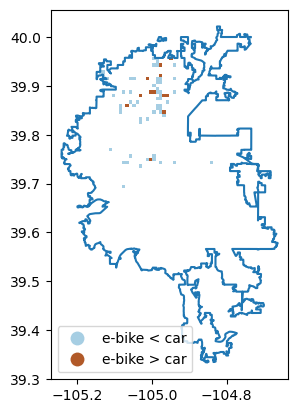

In [365]:
ax = denver_boundary.boundary.plot()
denver_pixels_2.replace({False: "e-bike < car", True: "e-bike > car"}, inplace=True)
denver_pixels_2.plot(column = "e_bike_better", ax = ax, legend=True, legend_kwds={"loc": "lower left"}, categorical=True, cmap="Paired", figsize=(12,6))

/tmp/ipykernel_185/1770822828.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  boulder_pixels_2.replace({False: "e-bike < car", True: "e-bike > car"}, inplace=True)


<Axes: >

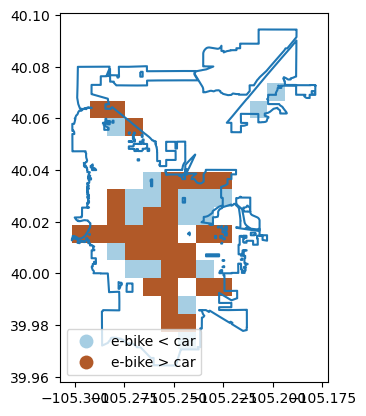

In [280]:
ax = boulder_boundary.boundary.plot()
boulder_pixels_2.replace({False: "e-bike < car", True: "e-bike > car"}, inplace=True)
boulder_pixels_2.plot(column = "e_bike_better", ax = ax, legend=True, legend_kwds={"loc": "lower left"}, categorical=True, cmap="Paired", figsize=(12,6))
# ax.legend(labels=["hello", "world"])

/tmp/ipykernel_185/3429840212.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fort_collins_pixels_2.replace({False: "e-bike < car", True: "e-bike > car"}, inplace=True)


<Axes: >

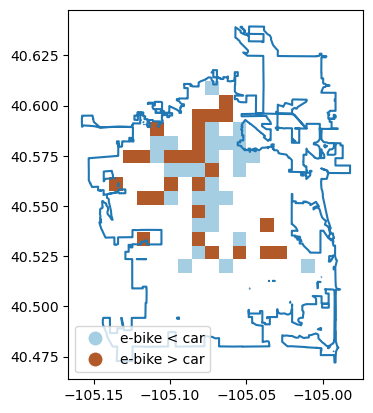

In [281]:
ax = fort_collins_boundary.boundary.plot()
fort_collins_pixels_2.replace({False: "e-bike < car", True: "e-bike > car"}, inplace=True)
fort_collins_pixels_2.plot(column = "e_bike_better", ax = ax, legend=True, legend_kwds={"loc": "lower left"}, categorical=True, cmap="Paired", figsize=(12,6))

/tmp/ipykernel_185/4008202011.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vail_pixels_2.replace({False: "e-bike < car", True: "e-bike > car"}, inplace=True)


<Axes: >

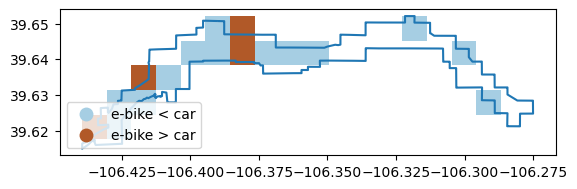

In [283]:
ax = vail_boundary.boundary.plot()
vail_pixels_2.replace({False: "e-bike < car", True: "e-bike > car"}, inplace=True)
vail_pixels_2.plot(column = "e_bike_better", ax = ax, legend=True, legend_kwds={"loc": "lower left"}, categorical=True, cmap="Paired", figsize=(12,6))

/tmp/ipykernel_185/3856632571.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  durango_pixels_2.replace({False: "e-bike < car", True: "e-bike > car"}, inplace=True)


<Axes: >

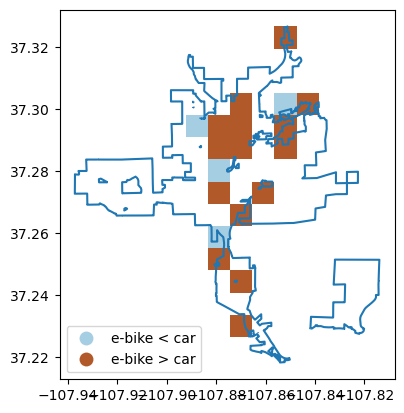

In [284]:
ax = durango_boundary.boundary.plot()
durango_pixels_2.replace({False: "e-bike < car", True: "e-bike > car"}, inplace=True)
durango_pixels_2.plot(column = "e_bike_better", ax = ax, legend=True, legend_kwds={"loc": "lower left"}, categorical=True, cmap="Paired", figsize=(12,6))

/tmp/ipykernel_185/1425152395.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pueblo_pixels_2.replace({False: "e-bike < car", True: "e-bike > car"}, inplace=True)


<Axes: >

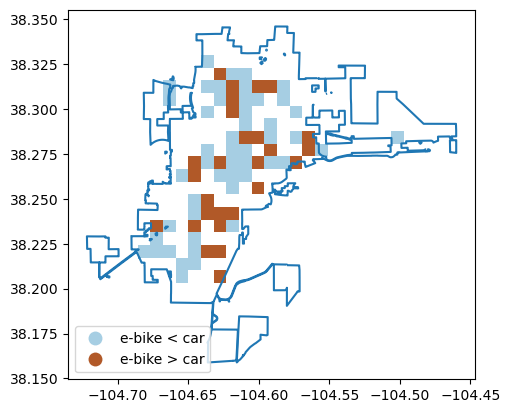

In [285]:
ax = pueblo_boundary.boundary.plot()
pueblo_pixels_2.replace({False: "e-bike < car", True: "e-bike > car"}, inplace=True)
pueblo_pixels_2.plot(column = "e_bike_better", ax = ax, legend=True, legend_kwds={"loc": "lower left"}, categorical=True, cmap="Paired", figsize=(12,6))

<AxesSubplot:title={'center':'Blocks where e-bikes are used more often than driving'}, ylabel='GEOID20'>

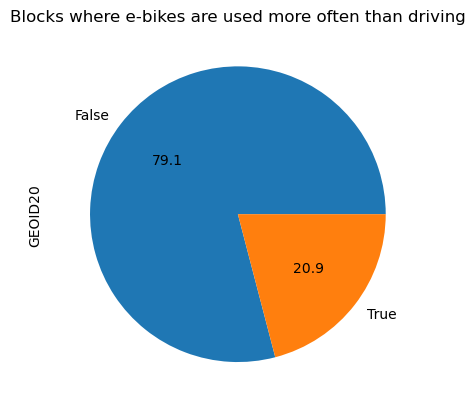

In [147]:
denver_blocks_2.groupby("e_bike_better").count().GEOID20.plot(kind="pie", autopct='%.1f', title="Blocks where e-bikes are used more often than driving")

<AxesSubplot:title={'center':'Pixels where e-bikes are used more often than driving'}, ylabel='id'>

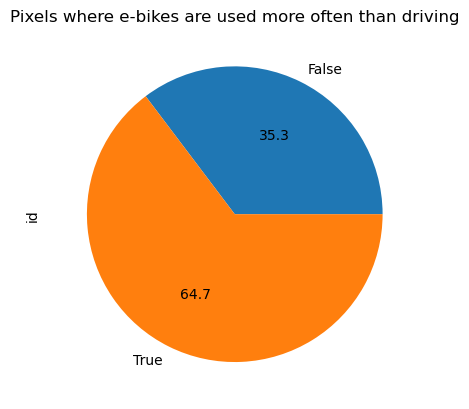

In [68]:
boulder_pixels_2.groupby("e_bike_better").count().id.plot(kind="pie", autopct='%.1f', title="Pixels where e-bikes are used more often than driving")

<AxesSubplot:title={'center':'Pixels where e-bikes are used more often than driving'}, ylabel='id'>

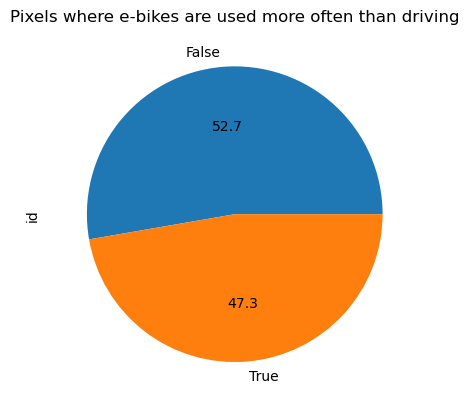

In [69]:
fort_collins_pixels_2.groupby("e_bike_better").count().id.plot(kind="pie", autopct='%.1f', title="Pixels where e-bikes are used more often than driving")

<AxesSubplot:title={'center':'Pixels where e-bikes are used more often than driving'}, ylabel='id'>

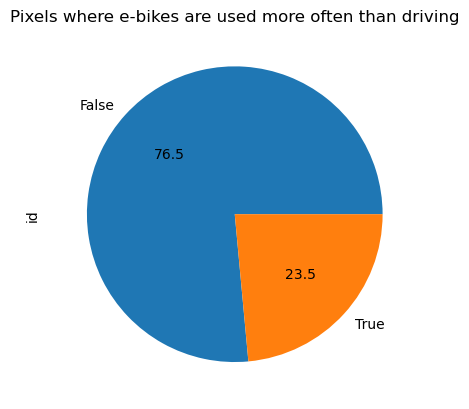

In [70]:
vail_pixels_2.groupby("e_bike_better").count().id.plot(kind="pie", autopct='%.1f', title="Pixels where e-bikes are used more often than driving")

<AxesSubplot:title={'center':'Pixels where e-bikes are used more often than driving'}, ylabel='id'>

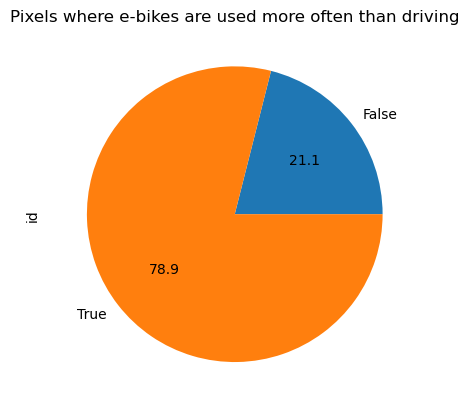

In [71]:
durango_pixels_2.groupby("e_bike_better").count().id.plot(kind="pie", autopct='%.1f', title="Pixels where e-bikes are used more often than driving")

<AxesSubplot:title={'center':'Pixels where e-bikes are used more often than driving'}, ylabel='id'>

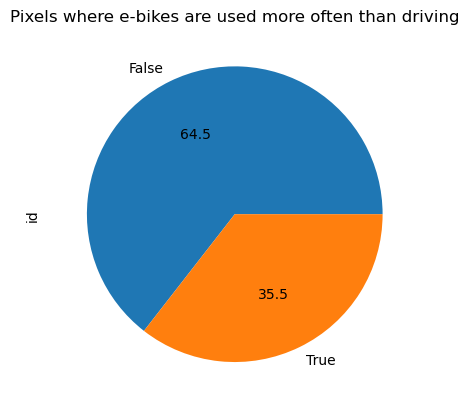

In [72]:
pueblo_pixels_2.groupby("e_bike_better").count().id.plot(kind="pie", autopct='%.1f', title="Pixels where e-bikes are used more often than driving")

In [73]:
#denver_blocks_2["e_bike_gt_50_pct"] = pd.Categorical(denver_blocks_2.e_bike_2_car_like >= 0.5)
boulder_pixels_2["e_bike_gt_50_pct"] = pd.Categorical(boulder_pixels_2.e_bike_2_car_like >= 0.5)
fort_collins_pixels_2["e_bike_gt_50_pct"] = pd.Categorical(fort_collins_pixels_2.e_bike_2_car_like >= 0.5)
vail_pixels_2["e_bike_gt_50_pct"] = pd.Categorical(vail_pixels_2.e_bike_2_car_like >= 0.5)
durango_pixels_2["e_bike_gt_50_pct"] = pd.Categorical(durango_pixels_2.e_bike_2_car_like >= 0.5)
pueblo_pixels_2["e_bike_gt_50_pct"] = pd.Categorical(pueblo_pixels_2.e_bike_2_car_like >= 0.5)

C:\Users\dakcicek\Anaconda3\envs\tsdc_ops\lib\site-packages\geopandas\geodataframe.py:1322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


In [ ]:
denver_blocks_2.groupby("e_bike_gt_50_pct").count().id.plot(kind="pie", autopct='%.1f', title="Blocks where e-bike trips are least 50% of driving trips")

<AxesSubplot:title={'center':'Pixels where e-bike trips are least 50% of driving trips'}, ylabel='id'>

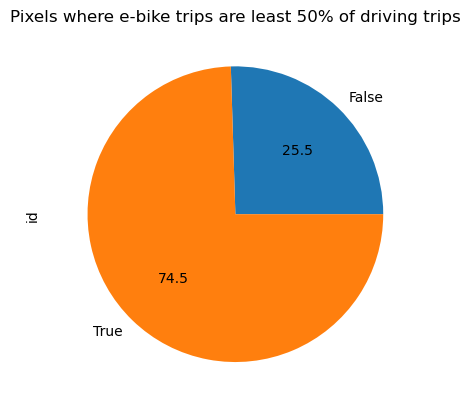

In [74]:
boulder_pixels_2.groupby("e_bike_gt_50_pct").count().id.plot(kind="pie", autopct='%.1f', title="Pixels where e-bike trips are least 50% of driving trips")

<AxesSubplot:title={'center':'Pixels where e-bike trips are least 50% of driving trips'}, ylabel='id'>

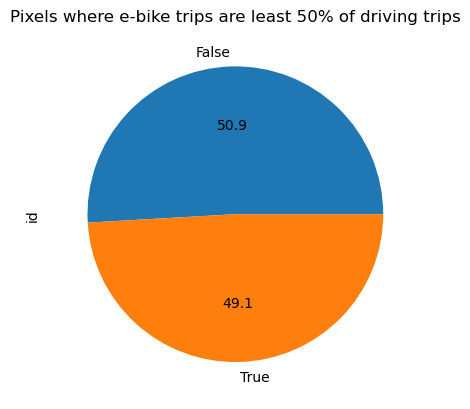

In [75]:
fort_collins_pixels_2.groupby("e_bike_gt_50_pct").count().id.plot(kind="pie", autopct='%.1f', title="Pixels where e-bike trips are least 50% of driving trips")

<AxesSubplot:title={'center':'Pixels where e-bike trips are least 50% of driving trips'}, ylabel='id'>

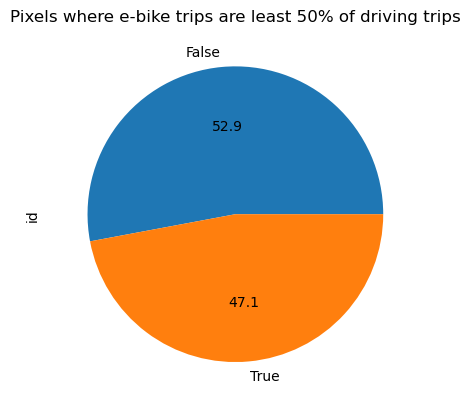

In [76]:
vail_pixels_2.groupby("e_bike_gt_50_pct").count().id.plot(kind="pie", autopct='%.1f', title="Pixels where e-bike trips are least 50% of driving trips")

<AxesSubplot:title={'center':'Pixels where e-bike trips are least 50% of driving trips'}, ylabel='id'>

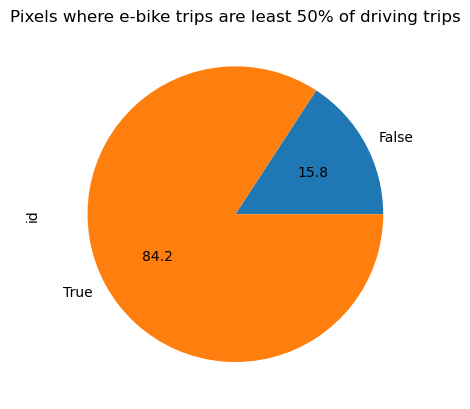

In [77]:
durango_pixels_2.groupby("e_bike_gt_50_pct").count().id.plot(kind="pie", autopct='%.1f', title="Pixels where e-bike trips are least 50% of driving trips")

<AxesSubplot:title={'center':'Pixels where e-bike trips are least 50% of driving trips'}, ylabel='id'>

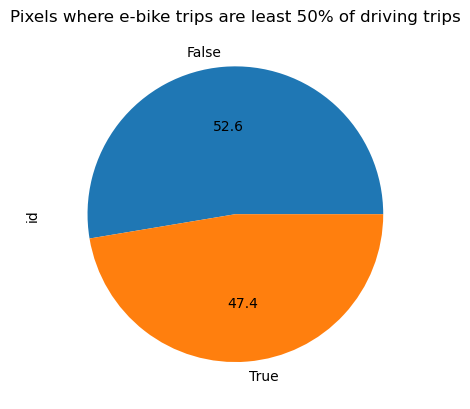

In [78]:
pueblo_pixels_2.groupby("e_bike_gt_50_pct").count().id.plot(kind="pie", autopct='%.1f', title="Pixels where e-bike trips are least 50% of driving trips")